In [1]:
def neighborIDToIndex(ContourStartingPointI, ContourStartingPointJ, id):
    if id == 0: return [ContourStartingPointI,     ContourStartingPointJ + 1]
    if id == 1: return [ContourStartingPointI - 1, ContourStartingPointJ + 1]
    if id == 2: return [ContourStartingPointI - 1, ContourStartingPointJ    ]
    if id == 3: return [ContourStartingPointI - 1, ContourStartingPointJ - 1]
    if id == 4: return [ContourStartingPointI,     ContourStartingPointJ - 1]
    if id == 5: return [ContourStartingPointI + 1, ContourStartingPointJ - 1]
    if id == 6: return [ContourStartingPointI + 1, ContourStartingPointJ    ]
    if id == 7: return [ContourStartingPointI + 1, ContourStartingPointJ + 1]
    return None
def neighborIndexToID(ContourStartingPointI, ContourStartingPointJ, ContourStartingPointMinesOneI, ContourStartingPointMinesOneJ):
    differenceI = ContourStartingPointMinesOneI - ContourStartingPointI
    differenceJ = ContourStartingPointMinesOneJ - ContourStartingPointJ
    if differenceI == 0 and differenceJ == 1: return 0
    if differenceI == -1 and differenceJ == 1: return 1
    if differenceI == -1 and differenceJ == 0: return 2
    if differenceI == -1 and differenceJ == -1: return 3
    if differenceI == 0 and differenceJ == -1: return 4
    if differenceI == 1 and differenceJ == -1: return 5
    if differenceI == 1 and differenceJ == 0: return 6
    if differenceI == 1 and differenceJ == 1: return 7
    return -1

In [2]:
def outClockwise(img, w, h, ContourStartingPointI, ContourStartingPointJ, ContourStartingPointMinesOneI, ContourStartingPointMinesOneJ, offset):
    id = neighborIndexToID(ContourStartingPointI, ContourStartingPointJ, ContourStartingPointMinesOneI, ContourStartingPointMinesOneJ)
    for k in range(8):
        kk = (k + id + offset) % 8
        ij = neighborIDToIndex(ContourStartingPointI, ContourStartingPointJ, kk)
        if img[ij[0], ij[1]].lastNumber != 0:
            return ij
    return None
def forClockwise(img, w, h, ContourStartingPointI, ContourStartingPointJ, ContourStartingPointMinesOneI, ContourStartingPointMinesOneJ, offset):
    id = neighborIndexToID(ContourStartingPointI, ContourStartingPointJ, ContourStartingPointMinesOneI, ContourStartingPointMinesOneJ)
    for k in range(8):
        kk = (-k + id - offset) % 8
        ij = neighborIDToIndex(ContourStartingPointI, ContourStartingPointJ, kk)
        if img[ij[0], ij[1]].lastNumber != 0:
            return ij
    return None

In [3]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
class PointImg:
    def __init__(self, lastNumber):
        self.countourNumbers = []
        self.lastNumber = lastNumber
class ClassContour:
    def __init__(self):
        self.points = []
        self.id = 0
        self.parent = 0

In [4]:
def findContoursCikl(img, w, h, ContourStartingPointI, ContourStartingPointJ, nbd, lnbd, contours, ContourStartingPointMinesOneI, ContourStartingPointMinesOneJ):
    Contour = ClassContour()
    Contour.points = [Point(ContourStartingPointJ, ContourStartingPointI)]
    Contour.id = nbd
    contours.append(Contour)
    PastContour = ClassContour()
    for f in range(len(contours)):
        if contours[f].id == lnbd:
            PastContour = contours[f]
            Contour.parent = PastContour.parent
            break
    i1, j1 = -1, -1
    i1j1 = forClockwise(img, w, h, ContourStartingPointI, ContourStartingPointJ, ContourStartingPointMinesOneI, ContourStartingPointMinesOneJ, 0)
    if i1j1 is None:
        img[ContourStartingPointI][ContourStartingPointJ].lastNumber = nbd
        img[ContourStartingPointI][ContourStartingPointJ].countourNumbers.append(nbd)
        if img[ContourStartingPointI][ContourStartingPointJ].lastNumber != 1:
            nbd = abs(img[ContourStartingPointI][ContourStartingPointJ].lastNumber)
        return False
    i1 = i1j1[0]
    j1 = i1j1[1]
    i2 = i1
    j2 = j1
    i3 = ContourStartingPointI
    j3 = ContourStartingPointJ
    while True:
        i4j4 = outClockwise(img, w, h, i3, j3, i2, j2, 1)
        if i4j4 is None:
            break
        i4, j4 = i4j4[0], i4j4[1]
        contours[-1].points.append(Point(j4, i4))
        if (img[i3,j3+1].lastNumber == 0):
            img[i3,j3].lastNumber = nbd;
            img[i3,j3].countourNumbers.append(nbd)
        elif img[i3,j3].lastNumber == 1:
            img[i3,j3].lastNumber = nbd
            img[i3,j3].countourNumbers.append(nbd)
        if i4 == ContourStartingPointI and j4 == ContourStartingPointJ and i3 == i1 and j3 == j1:
            if (img[ContourStartingPointI,ContourStartingPointJ].lastNumber!=1):
                lnbd = abs(img[ContourStartingPointI,ContourStartingPointJ].lastNumber)
            break
        else:
            i2 = i3
            j2 = j3
            i3 = i4
            j3 = j4
    return True

In [5]:
import math
def pointDistanceToSegment(point, linePoint1, linePoint2):
    rangeXPointToX1LinePoint = point.x - linePoint1.x
    rangeYPointToY1LinePoint = point.y - linePoint1.y
    rangeX2LinePointToX1LinePoint = linePoint2.x - linePoint1.x
    rangeY2LinePointToY1LinePoint = linePoint2.y - linePoint1.y
    dot = rangeXPointToX1LinePoint * rangeX2LinePointToX1LinePoint + rangeYPointToY1LinePoint * rangeY2LinePointToY1LinePoint
    len_sq = rangeX2LinePointToX1LinePoint * rangeX2LinePointToX1LinePoint + rangeY2LinePointToY1LinePoint * rangeY2LinePointToY1LinePoint
    param = -1
    if len_sq != 0:
        param = dot / len_sq
    xx, yy = 0, 0
    if param < 0:
        xx = linePoint1.x
        yy = linePoint1.y
    elif param > 1:
        xx = linePoint2.x
        yy = linePoint2.y
    else:
        xx = linePoint1.x + param * rangeX2LinePointToX1LinePoint
        yy = linePoint1.y + param * rangeY2LinePointToY1LinePoint
    dx = point.x - xx
    dy = point.y - yy
    return math.sqrt(dx * dx + dy * dy)
def approxPolyDp(polyline, epsilon):
    if len(polyline) <= 2:
        return polyline
    dmax = 0
    argmax = -1
    for i in range(1, len(polyline) - 1):
        d = pointDistanceToSegment(polyline[i], polyline[0], polyline[-1])
        if d > dmax:
            dmax = d
            argmax = i
    ret = []
    if dmax > epsilon:
        L = approxPolyDp(polyline[:argmax + 1], epsilon)#правая граница не включительно
        R = approxPolyDp(polyline[argmax:], epsilon)
        ret.extend(L[:-1])
        ret.extend(R)
    else:
        ret.append(polyline[0])
        ret.append(polyline[-1])
    return ret

In [6]:
def findContours(inputImg, w, h, approxContour):
    nbd = 1
    lnbd = 1
    contours = []
    inputImg = np.pad(inputImg, ((1, 1), (1, 1)), mode='constant', constant_values=0)
    img = np.empty((h, w), dtype=object)
    for i in range(0, h):
        for j in range(0, w):
            img[i][j] = PointImg(inputImg[i, j])
    for i in range(1, h-1):
        lnbd = 1
        for j in range(1, w-1):
            if img[i, j].lastNumber == 0:
                continue
            i2 = j2 = 0
            if (img[i, j].lastNumber == 1 and img[i, j-1].lastNumber == 0
                  and
               (img[i, j+1].lastNumber == 0 or img[i, j+1].lastNumber == 1)
                  and
               (img[i, j-1].lastNumber == 0 or img[i, j-1].lastNumber == 1)
                  and
               (img[i+1, j].lastNumber == 0 or img[i+1, j].lastNumber == 1)
                  and
               (img[i-1, j].lastNumber == 0 or img[i-1, j].lastNumber == 1)
                  and
               (img[i-1, j+1].lastNumber == 0 or img[i-1, j+1].lastNumber == 1)
                  and
               (img[i+1, j+1].lastNumber == 0 or img[i+1, j+1].lastNumber == 1)
                  and
               (img[i-1, j-1].lastNumber == 0 or img[i-1, j-1].lastNumber == 1)
                  and
               (img[i+1, j-1].lastNumber == 0 or img[i+1, j-1].lastNumber == 1)):
                nbd += 1
                ContourStartingPointI = i
                ContourStartingPointJ = j
                ContourStartingPointMinesOneI = i
                ContourStartingPointMinesOneJ = j - 1
            else:
                if (img[i, j].lastNumber!=1):
                    lnbd = abs(img[i, j].lastNumber)
                continue;
            if not findContoursCikl(img, w, h, ContourStartingPointI, ContourStartingPointJ, nbd, lnbd, contours, ContourStartingPointMinesOneI, ContourStartingPointMinesOneJ):
                continue
    for i in range(1, w-1):
        lnbd = 1
        for j in range(1, h-1):
            if img[j, i].lastNumber == 0:
                continue
            i2 = j2 = 0
            if img[j, i].lastNumber == 1 and img[j-1, i].lastNumber == 0 and (img[j, i-1].lastNumber == 1 and img[j, i+1].lastNumber == 1):
                ContourStartingPointI = j
                ContourStartingPointJ = i
                nbd += 1
                ContourStartingPointMinesOneI = j
                if(img[j, i-1].lastNumber == 1):
                    ContourStartingPointMinesOneJ = i - 1
                if(img[j, i+1].lastNumber == 1):
                    ContourStartingPointMinesOneJ = i + 1
            else:
                continue;
            if not findContoursCikl(img, w, h, ContourStartingPointI, ContourStartingPointJ, nbd, lnbd, contours, ContourStartingPointMinesOneI, ContourStartingPointMinesOneJ):
                continue
    checkKontursArr = []
    for i in range(1, h-1):
        for j in range(1, w-1):
            if img[i, j].lastNumber == 0:
                continue
            if img[i, j].lastNumber != 1 and img[i, j].lastNumber not in checkKontursArr:
                arrayTop = []
                arrayBottom = []
                arrayLeft = []
                arrayRight = []
                for right in range(j, w-1):
                    arrayRight+= img[i, right].countourNumbers
                for left in range(1, j+1):
                    arrayLeft+= img[i, left].countourNumbers
                for top in range(1, i+1):
                    arrayTop+= img[top, j].countourNumbers
                for bottom in range(i, h-1):
                    arrayBottom+= img[bottom, j].countourNumbers
                uniqueArrayTop = (set(arrayTop))
                uniqueArrayBottom = (set(arrayBottom))
                uniqueArrayLeft = (set(arrayLeft))
                uniqueArrayRight = (set(arrayRight))
                uniqueElements = list(uniqueArrayTop & uniqueArrayBottom & uniqueArrayLeft & uniqueArrayRight)
                checkKontursArr.append(img[i, j].lastNumber)
                if(len(uniqueElements)>1):
                    nowContour = 0
                    for f in range(len(contours)):
                        if contours[f].id == img[i, j].lastNumber:
                            nowContour = contours[f]
                            break
                    for f in range(len(contours)):
                        if contours[f].id == min(uniqueElements):
                            nowContour.parent = contours[f].id
                            break
    if(approxContour == True):
        for i in range(len(contours)):
            contours[i].points = approxPolyDp(contours[i].points, 1)
    return contours

In [7]:
def binarization(height, width, img, binarizedImg):
    for i in range(height):
        for j in range(width):
            pixel_value = img[i, j]
            if (pixel_value[0]>50):
                binarizedImg[i][j] = 1
            else:
                binarizedImg[i][j] = 0
    return binarizedImg

In [8]:
def outsideConourCount(contours):
    realCount = 0
    for i in range(len(contours)):
        if(contours[i].parent == 0):
            realCount+=1
    return realCount

In [9]:
def printContour(contours, finalImg, outside):
    for i in range(len(contours)):
        for j in range(len(contours[i].points)):
            if(outside == True):
                if(contours[i].parent == 0):
                    finalImg[contours[i].points[j].y][contours[i].points[j].x] = 144
            else:
                finalImg[contours[i].points[j].y][contours[i].points[j].x] = 144
    return finalImg

In [10]:
def findRectangle(contours, width, height):
    for i in range(len(contours)):
        xMin = width+2
        xMax = 0
        yMin = height+2
        yMax = 0
        for j in range(len(contours[i].points)):
          if(contours[i].points[j].y > yMax):
            yMax = contours[i].points[j].y
          if(contours[i].points[j].y < yMin):
            yMin = contours[i].points[j].y

          if(contours[i].points[j].x > xMax):
            xMax = contours[i].points[j].x
          if(contours[i].points[j].x < xMin):
            xMin = contours[i].points[j].x
        xMin-=1
        xMax+=1
        yMin-=1
        yMax+=1
        pryamougolArr = []
        for k in range(xMin, xMax+1):
          pryamougolArr.append(Point(k, yMin))
          pryamougolArr.append(Point(k, yMax))
        for n in range(yMin, yMax+1):
          pryamougolArr.append(Point(xMin, n))
          pryamougolArr.append(Point(xMax, n))
        contours[i].pointsPryamougol = pryamougolArr
        contours[i].xMin = xMin
        contours[i].xMax = xMax
        contours[i].yMin = yMin
        contours[i].yMax = yMax
    return contours

In [11]:
def areaOfPolygon(points):
    n = len(points)
    area = 0
    for i in range(n):
        x1 = points[i].y
        y1 = points[i].x
        x2 = points[(i + 1) % n].y
        y2 = points[(i + 1) % n].x
        area += ( - x1 * y2 + x2 * y1) / 2
    return abs(area)
def findArea(contours, printInfo):
    for i in range(len(contours)):
        polygonArea = areaOfPolygon(contours[i].points)
        contours[i].polygonArea = polygonArea
        if(printInfo == True):
            print("Площадь контура", i+1, "=", polygonArea)
    return contours

In [12]:
def distance(point1, point2):
    return math.sqrt((point1.x - point2.x)**2 + (point1.y - point2.y)**2)
def maxDistance(contours, printInfo):
    for i in range(len(contours)):
      maxDist = 0
      for k in range(len(contours[i].points)):
          for j in range(k+1, len(contours[i].points)):
              dist = distance(contours[i].points[k], contours[i].points[j])
              if dist > maxDist:
                  maxDist = dist
      contours[i].maxDistance = maxDist
      if(printInfo == True):
          print("Максимальная длина между точками в контуре ", i+1, "=", maxDist)
    return contours

In [13]:
import cv2
import numpy as np
import requests
from matplotlib import pyplot as plt
import math
def findContoursMethod(url, grid, printInfo, approxContour):
    response = requests.get(url)
    img = cv2.imdecode(np.frombuffer(response.content, np.uint8), -1)
    height, width = img.shape[:2]
    startingImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    binarizedImg = binarization(height, width, img, startingImg)
    contours = findContours(binarizedImg, width+2, height+2, approxContour)
    finalImg = np.full((height+2, width+2), 255)
    #Нахождение количества внешних контуров
    outsideConours = outsideConourCount(contours)
    if(printInfo == True):
        print("Количество найденных контуров: ", len(contours))
        print("Внешних контуров: ", outsideConours)
    #Нанесение найденных контуров на белое изображение
    printContour(contours, finalImg, False)
    #Нахождение прямоугольника
    contours = findRectangle(contours, width, height)
    #Нахождение площади
    contours = findArea(contours, printInfo)
    #Нахождение максимальной дистанции между точками
    contours = maxDistance(contours, printInfo)
    plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Оригинальное изображение')
    plt.subplot(122), plt.imshow(finalImg, cmap='gray'), plt.title('Модифицированный метод')
    #Включение сетки
    if(grid == True):
        ax = plt.gca()
        ax.set_xticks(np.arange(-.5, finalImg.shape[1], 1), minor=True)
        ax.set_yticks(np.arange(-.5, finalImg.shape[0], 1), minor=True)
        ax.grid(which='minor', color='r', linestyle='-', linewidth=1)
    plt.show()

Количество найденных контуров:  1
Внешних контуров:  1
Площадь контура 1 = 81.0
Максимальная длина между точками в контуре  1 = 12.727922061357855


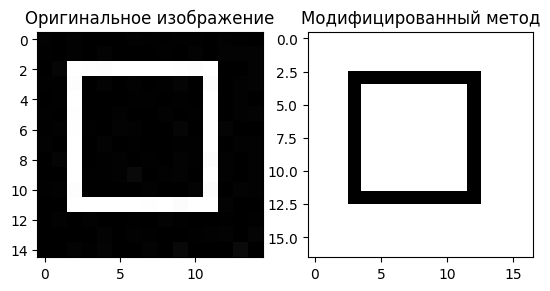

Количество найденных контуров:  2
Внешних контуров:  1
Площадь контура 1 = 81.0
Площадь контура 2 = 43.0
Максимальная длина между точками в контуре  1 = 12.727922061357855
Максимальная длина между точками в контуре  2 = 9.486832980505138


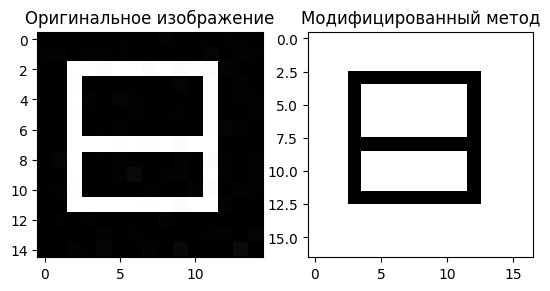

Количество найденных контуров:  3
Внешних контуров:  1
Площадь контура 1 = 110.0
Площадь контура 2 = 34.0
Площадь контура 3 = 34.0
Максимальная длина между точками в контуре  1 = 14.866068747318506
Максимальная длина между точками в контуре  2 = 9.219544457292887
Максимальная длина между точками в контуре  3 = 9.219544457292887


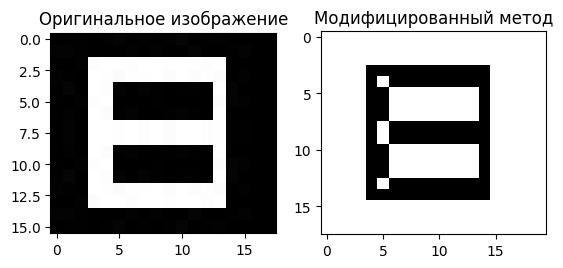

Количество найденных контуров:  2
Внешних контуров:  1
Площадь контура 1 = 81.0
Площадь контура 2 = 34.0
Максимальная длина между точками в контуре  1 = 12.727922061357855
Максимальная длина между точками в контуре  2 = 9.219544457292887


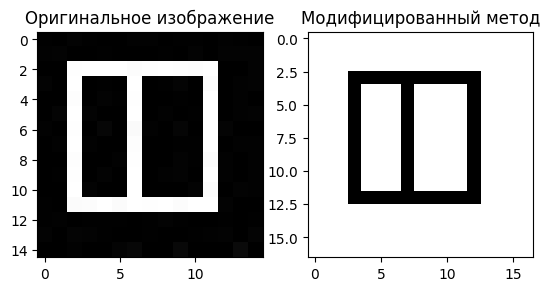

Количество найденных контуров:  4
Внешних контуров:  1
Площадь контура 1 = 81.0
Площадь контура 2 = 18.0
Площадь контура 3 = 14.0
Площадь контура 4 = 23.0
Максимальная длина между точками в контуре  1 = 12.727922061357855
Максимальная длина между точками в контуре  2 = 5.385164807134504
Максимальная длина между точками в контуре  3 = 4.47213595499958
Максимальная длина между точками в контуре  4 = 5.830951894845301


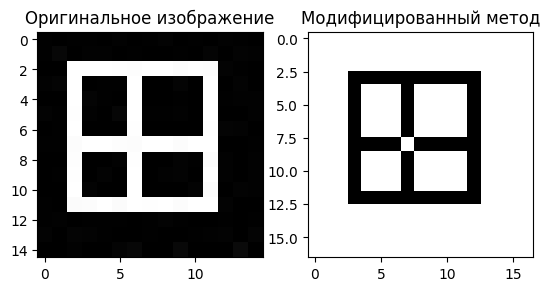

Количество найденных контуров:  6
Внешних контуров:  3
Площадь контура 1 = 81.0
Площадь контура 2 = 49.0
Площадь контура 3 = 18.0
Площадь контура 4 = 14.0
Площадь контура 5 = 34.5
Площадь контура 6 = 23.0
Максимальная длина между точками в контуре  1 = 12.727922061357855
Максимальная длина между точками в контуре  2 = 9.899494936611665
Максимальная длина между точками в контуре  3 = 5.385164807134504
Максимальная длина между точками в контуре  4 = 4.47213595499958
Максимальная длина между точками в контуре  5 = 8.246211251235321
Максимальная длина между точками в контуре  6 = 5.830951894845301


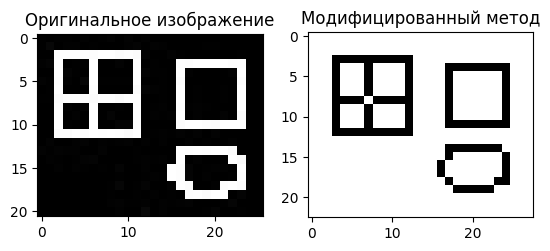

Количество найденных контуров:  1
Внешних контуров:  1
Площадь контура 1 = 123.0
Максимальная длина между точками в контуре  1 = 17.029386365926403


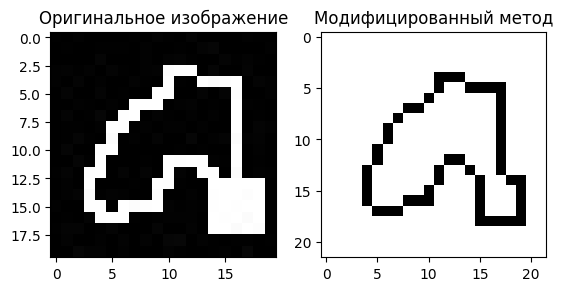

Количество найденных контуров:  17
Внешних контуров:  11
Площадь контура 1 = 266.0
Площадь контура 2 = 250.5
Площадь контура 3 = 228.5
Площадь контура 4 = 232.5
Площадь контура 5 = 361.5
Площадь контура 6 = 87.0
Площадь контура 7 = 41.0
Площадь контура 8 = 471.5
Площадь контура 9 = 0.0
Площадь контура 10 = 274.5
Площадь контура 11 = 0.0
Площадь контура 12 = 17.5
Площадь контура 13 = 1.0
Площадь контура 14 = 12.0
Площадь контура 15 = 34.5
Площадь контура 16 = 96.0
Площадь контура 17 = 207.5
Максимальная длина между точками в контуре  1 = 25.942243542145693
Максимальная длина между точками в контуре  2 = 24.73863375370596
Максимальная длина между точками в контуре  3 = 28.442925306655784
Максимальная длина между точками в контуре  4 = 21.400934559032695
Максимальная длина между точками в контуре  5 = 25.942243542145693
Максимальная длина между точками в контуре  6 = 15.132745950421556
Максимальная длина между точками в контуре  7 = 8.602325267042627
Максимальная длина между точками в кон

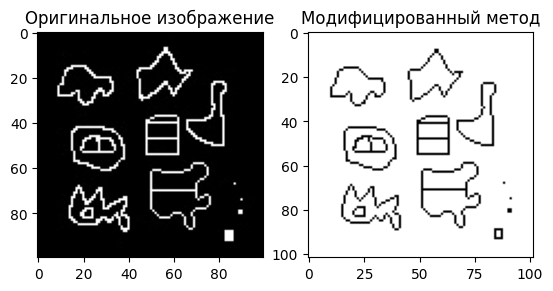

Количество найденных контуров:  64
Внешних контуров:  60
Площадь контура 1 = 5.5
Площадь контура 2 = 29.0
Площадь контура 3 = 7.5
Площадь контура 4 = 0.0
Площадь контура 5 = 3.5
Площадь контура 6 = 0.0
Площадь контура 7 = 37.0
Площадь контура 8 = 48.5
Площадь контура 9 = 17.5
Площадь контура 10 = 2.0
Площадь контура 11 = 11.5
Площадь контура 12 = 16.0
Площадь контура 13 = 9.0
Площадь контура 14 = 1.0
Площадь контура 15 = 1.0
Площадь контура 16 = 0.0
Площадь контура 17 = 0.0
Площадь контура 18 = 37.0
Площадь контура 19 = 2.0
Площадь контура 20 = 3.5
Площадь контура 21 = 0.0
Площадь контура 22 = 4.0
Площадь контура 23 = 0.0
Площадь контура 24 = 21.5
Площадь контура 25 = 0.0
Площадь контура 26 = 3.0
Площадь контура 27 = 4.5
Площадь контура 28 = 18.5
Площадь контура 29 = 3.0
Площадь контура 30 = 17.5
Площадь контура 31 = 8.5
Площадь контура 32 = 3.5
Площадь контура 33 = 4.0
Площадь контура 34 = 0.0
Площадь контура 35 = 0.0
Площадь контура 36 = 0.0
Площадь контура 37 = 10.5
Площадь контура 

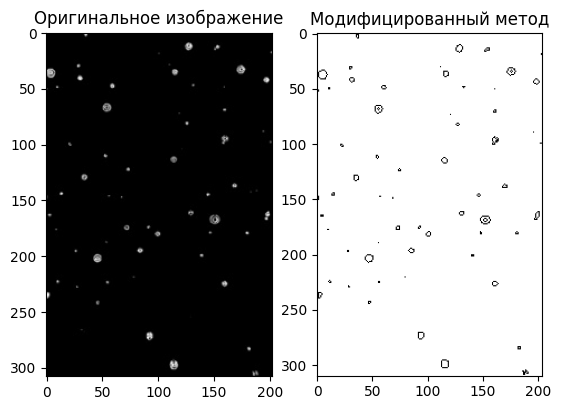

Количество найденных контуров:  100
Внешних контуров:  85
Площадь контура 1 = 33.0
Площадь контура 2 = 26.5
Площадь контура 3 = 8.0
Площадь контура 4 = 0.0
Площадь контура 5 = 58.5
Площадь контура 6 = 9.5
Площадь контура 7 = 3.5
Площадь контура 8 = 4.5
Площадь контура 9 = 5.5
Площадь контура 10 = 22.5
Площадь контура 11 = 5.5
Площадь контура 12 = 71.0
Площадь контура 13 = 14.5
Площадь контура 14 = 98.5
Площадь контура 15 = 2.0
Площадь контура 16 = 21.0
Площадь контура 17 = 35.5
Площадь контура 18 = 19.0
Площадь контура 19 = 68.5
Площадь контура 20 = 7.0
Площадь контура 21 = 3.5
Площадь контура 22 = 35.0
Площадь контура 23 = 239.0
Площадь контура 24 = 115.0
Площадь контура 25 = 60.5
Площадь контура 26 = 7.0
Площадь контура 27 = 12.5
Площадь контура 28 = 2.0
Площадь контура 29 = 1.5
Площадь контура 30 = 11.0
Площадь контура 31 = 1.0
Площадь контура 32 = 1.5
Площадь контура 33 = 18.0
Площадь контура 34 = 10.0
Площадь контура 35 = 32.0
Площадь контура 36 = 149.5
Площадь контура 37 = 155.5


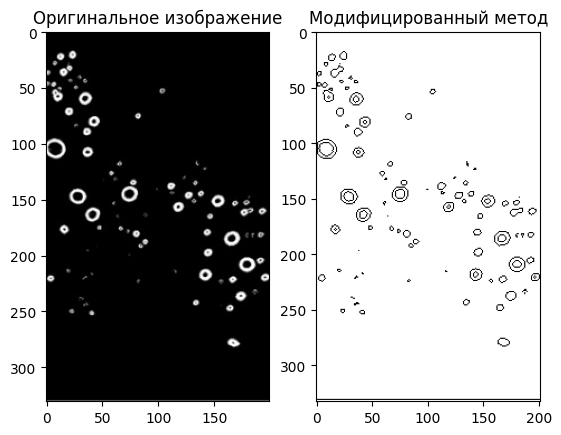

In [14]:
images_url = [
    "https://sun9-24.userapi.com/impg/Atxr5hdovLpt2LJddziKWKPqhTKF6MCng5F37Q/l_UySJGhN7A.jpg?size=15x15&quality=96&sign=59b3ff7f5b55b4df55183f1194149ceb&type=album",
    "https://sun9-35.userapi.com/impg/JOP-AW1ZaT9pouts5N_c1qrfWp_2fmed0HgkyQ/PqC4POO11A0.jpg?size=15x15&quality=96&sign=720ce9a2a885f7636b4bc019e8492c93&type=album",
    "https://sun9-42.userapi.com/impg/z8QS5smgWZ4DujR9RgIl9d8gCO12a5_A5_tUTA/tNu68LU3MZI.jpg?size=18x16&quality=96&sign=23e8b8dcc38d130d7da177be4ddb2ef5&type=album",
    "https://sun9-53.userapi.com/impg/tFzl5mNjpEEzUAxZFZWtpwpvwuMxRbMwJLcVzg/oXxNkaHVjnk.jpg?size=15x15&quality=96&sign=9afeb71b9f87037a1814b0383d52bfcd&type=album",
    "https://sun9-23.userapi.com/impg/n6ThXsyv2SGnPsQVBpZ0sh-d-6cgqogVp-Z0OQ/nIspcvPSP4A.jpg?size=15x15&quality=96&sign=1cbd7f5c5478dcae839a4b79c67f5401&type=album",
    "https://sun9-79.userapi.com/impg/3jaesehAGPun8XOKBAXJDtX8WqpQAZ7_80N6nw/kbqiyCD3eFk.jpg?size=26x21&quality=96&sign=93bfeca439dc8d8e5e16a69a302c6fd7&type=album",
    "https://sun9-70.userapi.com/impg/x5mJrWARHQOdfINQsZD0hztsleMFD2IpZeG0Gg/Q3hvUGZfv-o.jpg?size=20x20&quality=96&sign=f1ddd4cd5da14f93b27202d09207b34c&type=album",
    "https://sun9-76.userapi.com/impg/WjFR01emfAml-iUMQudOOJenPFrdX6YaW7HfnA/NXcBaKShjcQ.jpg?size=100x100&quality=96&sign=b74b9d99caa5efd202a82c07c2975fdc&type=album",
    "https://sun9-80.userapi.com/impg/OSyhdCPkDGav0eFfsuA1hyzXuCoKjgjtHMzRvg/IKS8zaWNOzs.jpg?size=202x308&quality=96&sign=ba1dc554d28acaf52a9cb8b21cc35df6&type=album",
    "https://sun9-30.userapi.com/impg/c9b7i1RfUsG4Ld7rHyeO-PuFafFSbEuvbiaA9g/Fd6OjhLw9d8.jpg?size=200x331&quality=96&sign=863a5a562318de7e37cb54ea26381a79&type=album"
    ]
for img in images_url:
  findContoursMethod(img, False, True, False)

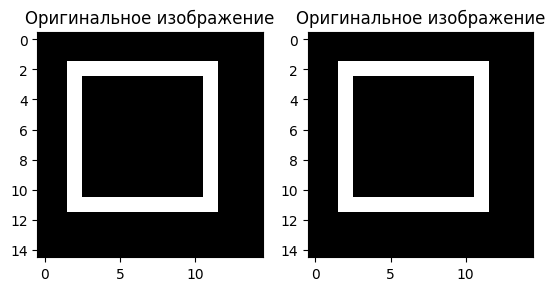

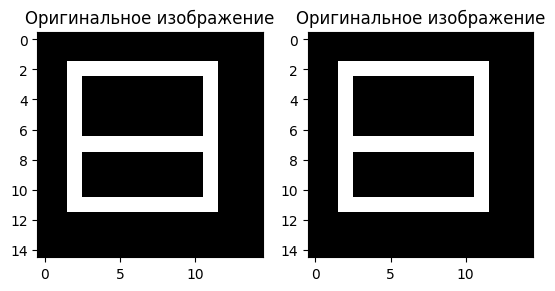

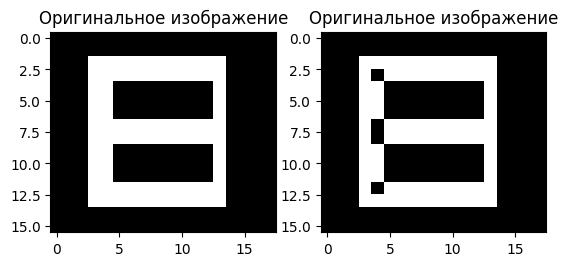

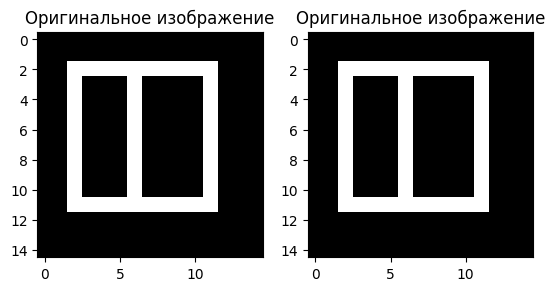

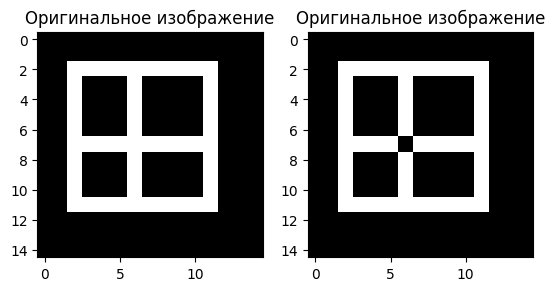

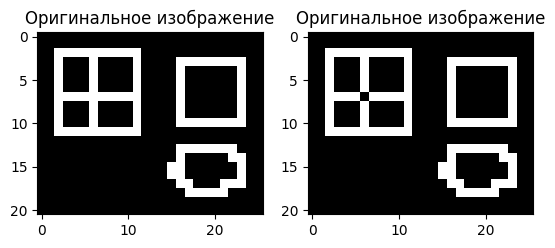

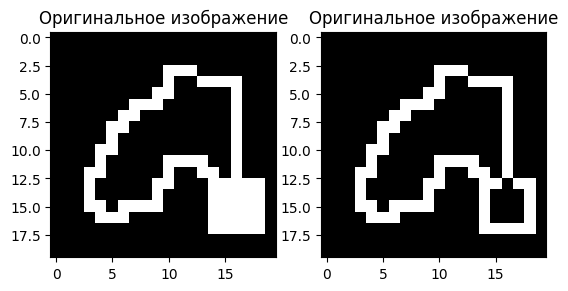

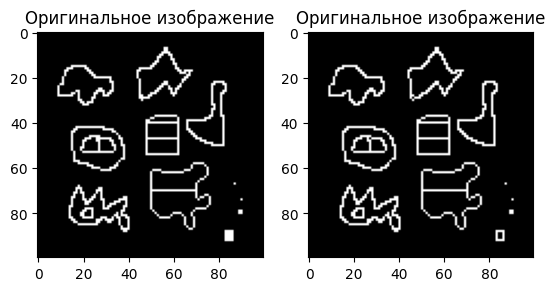

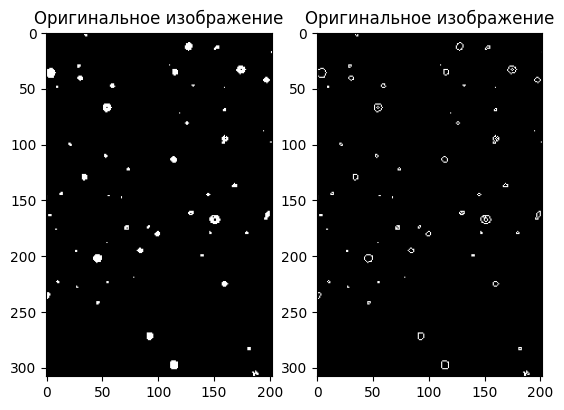

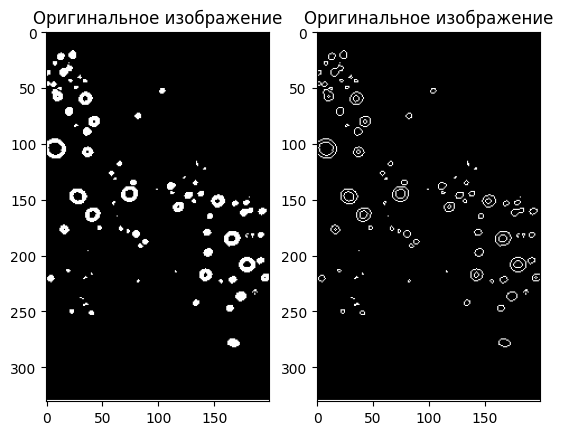

In [15]:
import cv2
import numpy as np
import requests
from io import BytesIO
from PIL import Image
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

def process_image(url):
    # Загрузка изображения из интернета
    response = requests.get(url)
    img = cv2.imdecode(np.frombuffer(response.content, np.uint8), -1)
    height, width = img.shape[:2]
    # Переводим изображение в оттенки серого
    startingImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Применяем размытие для сглаживания шумов
    binarizedImg = binarization(height, width, img, startingImg)

    # Поиск контуров
    contours, hierarchy = cv2.findContours(binarizedImg, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

    #create an empty image for contours
    img_contours = np.uint8(np.zeros((img.shape[0],img.shape[1])))

    cv2.drawContours(img_contours, contours, -1, (255,255,255), 1)


    plt.subplot(121), plt.imshow(binarizedImg, cmap='gray'), plt.title('Оригинальное изображение')
    plt.subplot(122), plt.imshow(img_contours, cmap='gray'), plt.title('Оригинальное изображение')
    plt.show()



# Пример использования
images_url = [
     "https://sun9-24.userapi.com/impg/Atxr5hdovLpt2LJddziKWKPqhTKF6MCng5F37Q/l_UySJGhN7A.jpg?size=15x15&quality=96&sign=59b3ff7f5b55b4df55183f1194149ceb&type=album",
    "https://sun9-35.userapi.com/impg/JOP-AW1ZaT9pouts5N_c1qrfWp_2fmed0HgkyQ/PqC4POO11A0.jpg?size=15x15&quality=96&sign=720ce9a2a885f7636b4bc019e8492c93&type=album",
    "https://sun9-42.userapi.com/impg/z8QS5smgWZ4DujR9RgIl9d8gCO12a5_A5_tUTA/tNu68LU3MZI.jpg?size=18x16&quality=96&sign=23e8b8dcc38d130d7da177be4ddb2ef5&type=album",
    "https://sun9-53.userapi.com/impg/tFzl5mNjpEEzUAxZFZWtpwpvwuMxRbMwJLcVzg/oXxNkaHVjnk.jpg?size=15x15&quality=96&sign=9afeb71b9f87037a1814b0383d52bfcd&type=album",
    "https://sun9-23.userapi.com/impg/n6ThXsyv2SGnPsQVBpZ0sh-d-6cgqogVp-Z0OQ/nIspcvPSP4A.jpg?size=15x15&quality=96&sign=1cbd7f5c5478dcae839a4b79c67f5401&type=album",
    "https://sun9-79.userapi.com/impg/3jaesehAGPun8XOKBAXJDtX8WqpQAZ7_80N6nw/kbqiyCD3eFk.jpg?size=26x21&quality=96&sign=93bfeca439dc8d8e5e16a69a302c6fd7&type=album",
    "https://sun9-70.userapi.com/impg/x5mJrWARHQOdfINQsZD0hztsleMFD2IpZeG0Gg/Q3hvUGZfv-o.jpg?size=20x20&quality=96&sign=f1ddd4cd5da14f93b27202d09207b34c&type=album",
    "https://sun9-76.userapi.com/impg/WjFR01emfAml-iUMQudOOJenPFrdX6YaW7HfnA/NXcBaKShjcQ.jpg?size=100x100&quality=96&sign=b74b9d99caa5efd202a82c07c2975fdc&type=album",
    "https://sun9-80.userapi.com/impg/OSyhdCPkDGav0eFfsuA1hyzXuCoKjgjtHMzRvg/IKS8zaWNOzs.jpg?size=202x308&quality=96&sign=ba1dc554d28acaf52a9cb8b21cc35df6&type=album",
    "https://sun9-30.userapi.com/impg/c9b7i1RfUsG4Ld7rHyeO-PuFafFSbEuvbiaA9g/Fd6OjhLw9d8.jpg?size=200x331&quality=96&sign=863a5a562318de7e37cb54ea26381a79&type=album"
    ]
for img in images_url:
  process_image(img)


In [16]:
class SuzukiMethod:
    N_PIXEL_NEIGHBOR = 8

    @staticmethod
    def neighbor_id_to_index(i, j, idx):
        if idx == 0:
            return i, j + 1
        elif idx == 1:
            return i - 1, j + 1
        elif idx == 2:
            return i - 1, j
        elif idx == 3:
            return i - 1, j - 1
        elif idx == 4:
            return i, j - 1
        elif idx == 5:
            return i + 1, j - 1
        elif idx == 6:
            return i + 1, j
        elif idx == 7:
            return i + 1, j + 1
        return None

    @staticmethod
    def neighbor_index_to_id(ContourStartingPointI, ContourStartingPointJ, ContourStartingPoinMinesOneI, ContourStartingPoinMinesOneJ):
        di = ContourStartingPoinMinesOneI - ContourStartingPointI
        dj = ContourStartingPoinMinesOneJ - ContourStartingPointJ
        if di == 0 and dj == 1:
            return 0
        elif di == -1 and dj == 1:
            return 1
        elif di == -1 and dj == 0:
            return 2
        elif di == -1 and dj == -1:
            return 3
        elif di == 0 and dj == -1:
            return 4
        elif di == 1 and dj == -1:
            return 5
        elif di == 1 and dj == 0:
            return 6
        elif di == 1 and dj == 1:
            return 7
        return -1

    def ccw_non_0(F, w, h, i0, j0, i, j, offset):
      id = SuzukiMethod.neighbor_index_to_id(i0, j0, i, j)
      for k in range(SuzukiMethod.N_PIXEL_NEIGHBOR):
          kk = (k + id + offset + SuzukiMethod.N_PIXEL_NEIGHBOR * 2) % SuzukiMethod.N_PIXEL_NEIGHBOR
          ij = SuzukiMethod.neighbor_id_to_index(i0, j0, kk)
          if F[ij[0]][ij[1]] != 0:
            return ij
      return None

    def cw_non_0(F, w, h, ContourStartingPointI, ContourStartingPointJ, ContourStartingPoinMinesOneI, ContourStartingPoinMinesOneJ, offset):
        id = SuzukiMethod.neighbor_index_to_id(ContourStartingPointI, ContourStartingPointJ, ContourStartingPoinMinesOneI, ContourStartingPoinMinesOneJ)
        for k in range(SuzukiMethod.N_PIXEL_NEIGHBOR):
            kk = (-k + id - offset + SuzukiMethod.N_PIXEL_NEIGHBOR * 2) % SuzukiMethod.N_PIXEL_NEIGHBOR
            ij = SuzukiMethod.neighbor_id_to_index(ContourStartingPointI, ContourStartingPointJ, kk)
            if F[ij[0]][ij[1]] != 0:
                return ij
        return None


    class Point:
      def __init__(self, x, y):
              self.x = x
              self.y = y

    class Contour:
      def __init__(self):
          self.points = []
          self.id = None
          self.parent = None
          self.isHole = None

    def findContours(img, w, h):
      contourNumber = 1 # Номер контура
      contours = [] # Массив контуров

      for i in range(0, h):
        for j in range(0, w):
            ContourStartingPoinMinesOneI, ContourStartingPoinMinesOneJ = 0, 0

            if img[i][j] == 0:
                continue

            if img[i][j] == 1 and img[i][j - 1] == 0: # Нашли начало контура
                contourNumber += 1
                ContourStartingPointI = i
                ContourStartingPointJ = j
                ContourStartingPoinMinesOneI = i
                ContourStartingPoinMinesOneJ = j - 1
            else:
                continue

            Contour = SuzukiMethod.Contour()

            Contour.points = []
            Contour.points.append(SuzukiMethod.Point(ContourStartingPointJ, ContourStartingPointI))

            Contour.isHole = (img[ContourStartingPointI][ContourStartingPointJ] - img[ContourStartingPointI+1][ContourStartingPointJ] >= 1)

            Contour.id = contourNumber

            contours.append(Contour)

            i1, j1 = -1, -1
            i1j1 = SuzukiMethod.cw_non_0(img, w, h, ContourStartingPointI, ContourStartingPointJ, ContourStartingPoinMinesOneI, ContourStartingPoinMinesOneJ, 0)
            if i1j1 is None:
                img[ContourStartingPointI][ContourStartingPointJ] = -contourNumber
                continue
            i1, j1 = i1j1

            ContourStartingPoinMinesOneI, ContourStartingPoinMinesOneJ = i1, j1
            findingContourInWhileStartingPointI, findingContourInWhileStartingPointJ = ContourStartingPointI, ContourStartingPointJ

            while True:
                i4j4 = SuzukiMethod.ccw_non_0(img, w, h, findingContourInWhileStartingPointI, findingContourInWhileStartingPointJ, ContourStartingPoinMinesOneI, ContourStartingPoinMinesOneJ, 1)

                if i4j4 is None:
                  break

                NextPointInContourI, NextPointInContourJ = i4j4[0], i4j4[1]

                contours[-1].points.append(SuzukiMethod.Point(NextPointInContourJ, NextPointInContourI))

                if img[findingContourInWhileStartingPointI][findingContourInWhileStartingPointJ + 1] == 0:
                    img[findingContourInWhileStartingPointI][findingContourInWhileStartingPointJ] = -contourNumber
                elif img[findingContourInWhileStartingPointI][findingContourInWhileStartingPointJ] == 1:
                    img[findingContourInWhileStartingPointI][findingContourInWhileStartingPointJ] = contourNumber

                if NextPointInContourI == ContourStartingPointI and NextPointInContourJ == ContourStartingPointJ and findingContourInWhileStartingPointI == i1 and findingContourInWhileStartingPointJ == j1:
                    break
                else:
                    ContourStartingPoinMinesOneI, ContourStartingPoinMinesOneJ = findingContourInWhileStartingPointI, findingContourInWhileStartingPointJ
                    findingContourInWhileStartingPointI, findingContourInWhileStartingPointJ = NextPointInContourI, NextPointInContourJ

      return contours

<ipython-input-16-f255dc1e749b>:129: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -2 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img[findingContourInWhileStartingPointI][findingContourInWhileStartingPointJ] = -contourNumber


Количество найденных контуров:  1


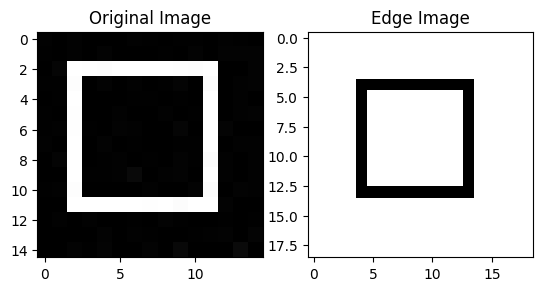

Количество найденных контуров:  1


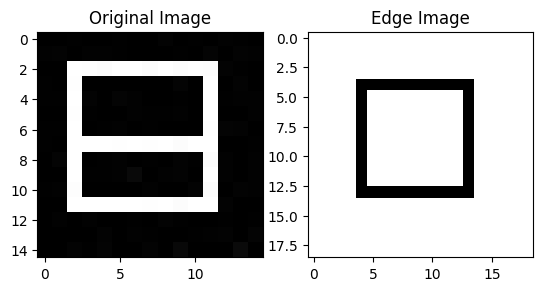

Количество найденных контуров:  1


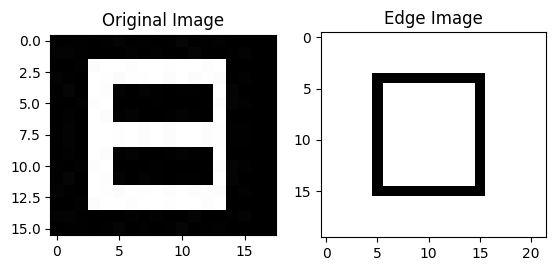

<ipython-input-16-f255dc1e749b>:129: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -3 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img[findingContourInWhileStartingPointI][findingContourInWhileStartingPointJ] = -contourNumber


Количество найденных контуров:  2


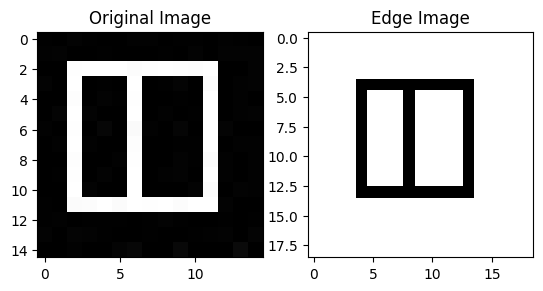

<ipython-input-16-f255dc1e749b>:129: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -4 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img[findingContourInWhileStartingPointI][findingContourInWhileStartingPointJ] = -contourNumber


Количество найденных контуров:  3


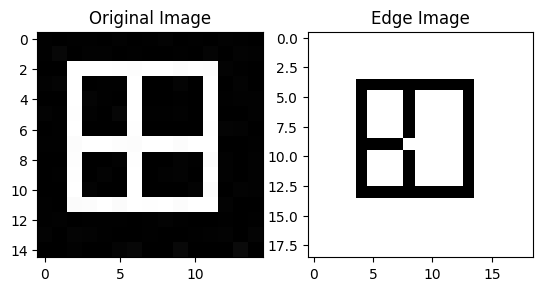

<ipython-input-16-f255dc1e749b>:129: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -5 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img[findingContourInWhileStartingPointI][findingContourInWhileStartingPointJ] = -contourNumber
<ipython-input-16-f255dc1e749b>:129: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -6 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img[findingContourInWhileStartingPointI][findingContourInWhileStartingPointJ] = -contourNumber
<ipython-input-16-f255dc1e749b>:129: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -7 to uint8

Количество найденных контуров:  6


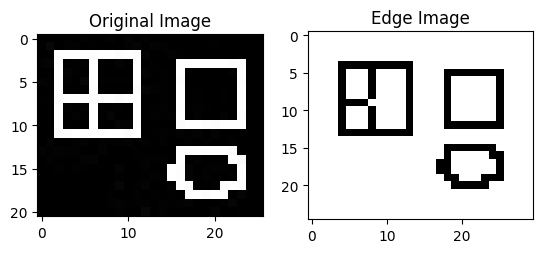

<ipython-input-16-f255dc1e749b>:102: RuntimeWarning: overflow encountered in scalar subtract
  Contour.isHole = (img[ContourStartingPointI][ContourStartingPointJ] - img[ContourStartingPointI+1][ContourStartingPointJ] >= 1)


Количество найденных контуров:  2


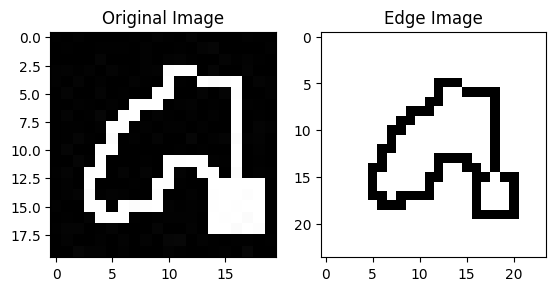

<ipython-input-16-f255dc1e749b>:129: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -8 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img[findingContourInWhileStartingPointI][findingContourInWhileStartingPointJ] = -contourNumber
<ipython-input-16-f255dc1e749b>:129: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -9 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img[findingContourInWhileStartingPointI][findingContourInWhileStartingPointJ] = -contourNumber
<ipython-input-16-f255dc1e749b>:129: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -10 to uint

Количество найденных контуров:  21


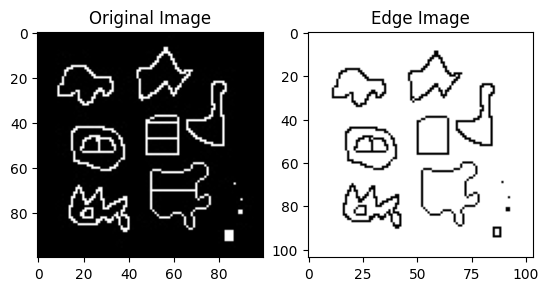

<ipython-input-16-f255dc1e749b>:111: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -7 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img[ContourStartingPointI][ContourStartingPointJ] = -contourNumber
<ipython-input-16-f255dc1e749b>:129: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -15 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img[findingContourInWhileStartingPointI][findingContourInWhileStartingPointJ] = -contourNumber
<ipython-input-16-f255dc1e749b>:111: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -17 to uint8 will fail in the future.


Количество найденных контуров:  66


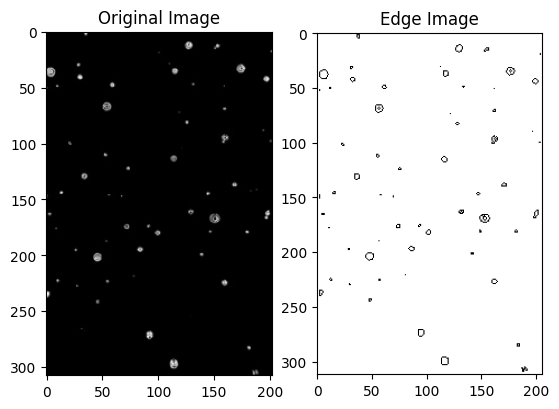

<ipython-input-16-f255dc1e749b>:111: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -5 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img[ContourStartingPointI][ContourStartingPointJ] = -contourNumber
<ipython-input-16-f255dc1e749b>:129: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -24 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img[findingContourInWhileStartingPointI][findingContourInWhileStartingPointJ] = -contourNumber
<ipython-input-16-f255dc1e749b>:111: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -46 to uint8 will fail in the future.


Количество найденных контуров:  100


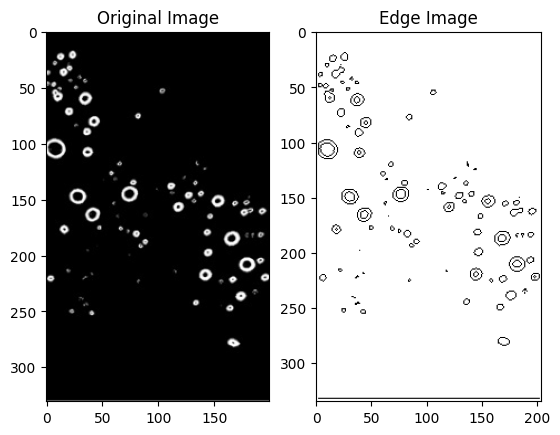

In [17]:
import cv2
import numpy as np
import requests
from matplotlib import pyplot as plt

def process_image(url):
    # Загрузка изображения из интернета
    response = requests.get(url)
    img = cv2.imdecode(np.frombuffer(response.content, np.uint8), -1)

    # Размеры изображения
    height, width = img.shape[:2]

    # Перевод изображения в оттенки серого
    gray_notPad = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Перевод изображения в бинарное по порогу цвета 10 (R)
    for i in range(height):
        for j in range(width):
            pixel_value = img[i, j]
            if (pixel_value[0]>50):
              gray_notPad[i][j] = 1
            else:
               gray_notPad[i][j] = 0

    # Добавление 2 дополнительных рядов единиц по краям
    gray = np.pad(gray_notPad, ((2, 2), (2, 2)), mode='constant', constant_values=0)

    # Нахождение контуров
    contours = SuzukiMethod.findContours(gray, width+4, height+4)

    # Перевод обработынного изображения в полностью белое
    for i in range(height+4):
        for j in range(width+4):
            gray[i][j] = 255


    print("Количество найденных контуров: ", len(contours))

    # Нанесение найденных контуров на белое изображение
    for i in range(len(contours)):
        for j in range(len(contours[i].points)):
            gray[ contours[i].points[j].y][contours[i].points[j].x] = 144

    # Отображение изображения и контуров
    plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Original Image')
    plt.subplot(122), plt.imshow(gray, cmap='gray'), plt.title('Edge Image')
    plt.show()





# Пример использования
images_url = [
     "https://sun9-24.userapi.com/impg/Atxr5hdovLpt2LJddziKWKPqhTKF6MCng5F37Q/l_UySJGhN7A.jpg?size=15x15&quality=96&sign=59b3ff7f5b55b4df55183f1194149ceb&type=album",
    "https://sun9-35.userapi.com/impg/JOP-AW1ZaT9pouts5N_c1qrfWp_2fmed0HgkyQ/PqC4POO11A0.jpg?size=15x15&quality=96&sign=720ce9a2a885f7636b4bc019e8492c93&type=album",
    "https://sun9-42.userapi.com/impg/z8QS5smgWZ4DujR9RgIl9d8gCO12a5_A5_tUTA/tNu68LU3MZI.jpg?size=18x16&quality=96&sign=23e8b8dcc38d130d7da177be4ddb2ef5&type=album",
    "https://sun9-53.userapi.com/impg/tFzl5mNjpEEzUAxZFZWtpwpvwuMxRbMwJLcVzg/oXxNkaHVjnk.jpg?size=15x15&quality=96&sign=9afeb71b9f87037a1814b0383d52bfcd&type=album",
    "https://sun9-23.userapi.com/impg/n6ThXsyv2SGnPsQVBpZ0sh-d-6cgqogVp-Z0OQ/nIspcvPSP4A.jpg?size=15x15&quality=96&sign=1cbd7f5c5478dcae839a4b79c67f5401&type=album",
    "https://sun9-79.userapi.com/impg/3jaesehAGPun8XOKBAXJDtX8WqpQAZ7_80N6nw/kbqiyCD3eFk.jpg?size=26x21&quality=96&sign=93bfeca439dc8d8e5e16a69a302c6fd7&type=album",
    "https://sun9-70.userapi.com/impg/x5mJrWARHQOdfINQsZD0hztsleMFD2IpZeG0Gg/Q3hvUGZfv-o.jpg?size=20x20&quality=96&sign=f1ddd4cd5da14f93b27202d09207b34c&type=album",
    "https://sun9-76.userapi.com/impg/WjFR01emfAml-iUMQudOOJenPFrdX6YaW7HfnA/NXcBaKShjcQ.jpg?size=100x100&quality=96&sign=b74b9d99caa5efd202a82c07c2975fdc&type=album",
    "https://sun9-80.userapi.com/impg/OSyhdCPkDGav0eFfsuA1hyzXuCoKjgjtHMzRvg/IKS8zaWNOzs.jpg?size=202x308&quality=96&sign=ba1dc554d28acaf52a9cb8b21cc35df6&type=album",
    "https://sun9-30.userapi.com/impg/c9b7i1RfUsG4Ld7rHyeO-PuFafFSbEuvbiaA9g/Fd6OjhLw9d8.jpg?size=200x331&quality=96&sign=863a5a562318de7e37cb54ea26381a79&type=album"
    ]

for img in images_url:
  process_image(img)



In [18]:
import cv2
import numpy as np
import requests
from matplotlib import pyplot as plt
import math
import time

def findContoursMethodFull(url, grid, printInfo, approxContour):
    response = requests.get(url)
    img = cv2.imdecode(np.frombuffer(response.content, np.uint8), -1)
    height, width = img.shape[:2]
    startingImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    binarizedImg = binarization(height, width, img, startingImg)


    gray_notPad = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_notPad2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Перевод изображения в бинарное по порогу цвета 10 (R)
    for i in range(height):
        for j in range(width):
            pixel_value = img[i, j]
            if (pixel_value[0]>50):
              gray_notPad[i][j] = 1
            else:
               gray_notPad[i][j] = 0

    # Добавление 2 дополнительных рядов единиц по краям
    gray = np.pad(gray_notPad, ((2, 2), (2, 2)), mode='constant', constant_values=0)
    gray2 = np.pad(gray_notPad, ((1, 1), (1, 1)), mode='constant', constant_values=0)

    # Нахождение контуров
    startTimeDefault = time.time()
    contoursDefault = SuzukiMethod.findContours(gray, width+4, height+4)
    endTimeDefault = time.time()
    # Перевод обработынного изображения в полностью белое
    for i in range(height+2):
        for j in range(width+2):
            gray2[i][j] = 255

    contoursDefaultOutside = 0
    # Нанесение найденных контуров на белое изображение
    for i in range(len(contoursDefault)):
      if(not contoursDefault[i].isHole):
        contoursDefaultOutside += 1
      for j in range(len(contoursDefault[i].points)):
         gray2[ contoursDefault[i].points[j].y-1][contoursDefault[i].points[j].x-1] = 144


    startTime = time.time()
    contours = findContours(binarizedImg, width+2, height+2, approxContour)
    endTime = time.time()

    finalImg = np.full((height+2, width+2), 255)
    #Нахождение количества внешних контуров
    outsideConours = outsideConourCount(contours)



    if(printInfo == True):
        print("Количество найденных контуров: ", len(contours))
        print("Внешних контуров: ", outsideConours)
    #Нанесение найденных контуров на белое изображение
    printContour(contours, finalImg, False)
    #Нахождение прямоугольника
    contours = findRectangle(contours, width, height)
    #Нахождение площади
    contours = findArea(contours, printInfo)
    #Нахождение максимальной дистанции между точками
    contours = maxDistance(contours, printInfo)

    print("")
    print("")
    print("Время работы исходного метода: ", endTimeDefault - startTimeDefault)
    print("Время работы модифицированного метода: ", endTime - startTime)
    print("")
    print("")
    print("Количество внешних найденных контуров исходным методом: ", contoursDefaultOutside)
    print("Количество внешних найденных контуров модифицированным методом: ", outsideConours)
    print("Количество внешних контуров на картинке: ", outsideConours)
    print("")
    print("")
    print("Количество найденных контуров исходным методом: ", len(contoursDefault))
    print("Количество найденных контуров модифицированным методом: ", len(contours))
    print("Количество контуров на картинке: ", len(contours))
    print("")
    print("")

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1), plt.imshow(img, cmap='gray'), plt.title('Оригинальное изображение')
    plt.subplot(1, 3, 2), plt.imshow(gray2, cmap='gray'), plt.title('Исходный метод')
    plt.subplot(1, 3, 3), plt.imshow(finalImg, cmap='gray'), plt.title('Модифицированный метод')



    #Включение сетки
    if(grid == True):
        ax = plt.gca()
        ax.set_xticks(np.arange(-.5, finalImg.shape[1], 1), minor=True)
        ax.set_yticks(np.arange(-.5, finalImg.shape[0], 1), minor=True)
        ax.grid(which='minor', color='r', linestyle='-', linewidth=1)
    plt.show()

<ipython-input-16-f255dc1e749b>:129: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -2 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img[findingContourInWhileStartingPointI][findingContourInWhileStartingPointJ] = -contourNumber




Время работы исходного метода:  0.002490997314453125
Время работы модифицированного метода:  0.0024156570434570312


Количество внешних найденных контуров исходным методом:  1
Количество внешних найденных контуров модифицированным методом:  1
Количество внешних контуров на картинке:  1


Количество найденных контуров исходным методом:  1
Количество найденных контуров модифицированным методом:  1
Количество контуров на картинке:  1




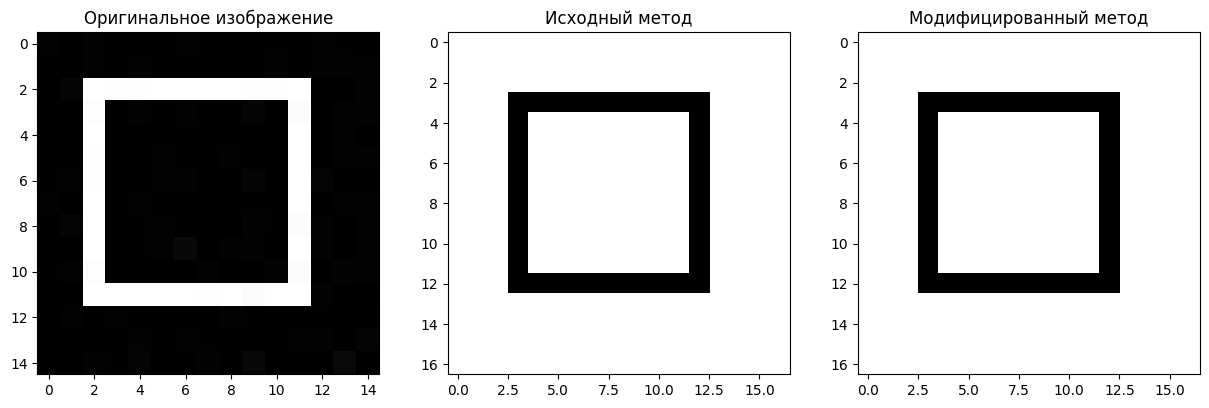



Время работы исходного метода:  0.0015702247619628906
Время работы модифицированного метода:  0.003567218780517578


Количество внешних найденных контуров исходным методом:  1
Количество внешних найденных контуров модифицированным методом:  1
Количество внешних контуров на картинке:  1


Количество найденных контуров исходным методом:  1
Количество найденных контуров модифицированным методом:  2
Количество контуров на картинке:  2




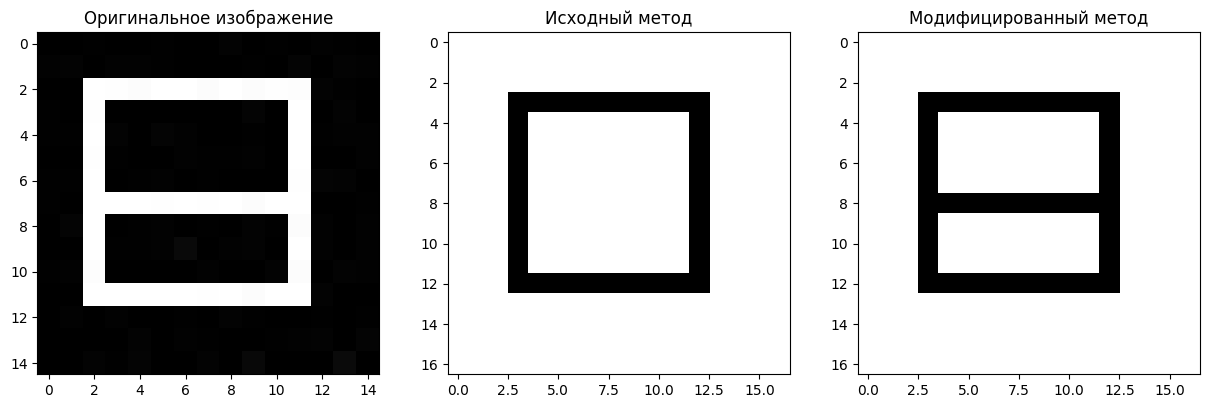



Время работы исходного метода:  0.0018351078033447266
Время работы модифицированного метода:  0.0034415721893310547


Количество внешних найденных контуров исходным методом:  1
Количество внешних найденных контуров модифицированным методом:  1
Количество внешних контуров на картинке:  1


Количество найденных контуров исходным методом:  1
Количество найденных контуров модифицированным методом:  3
Количество контуров на картинке:  3




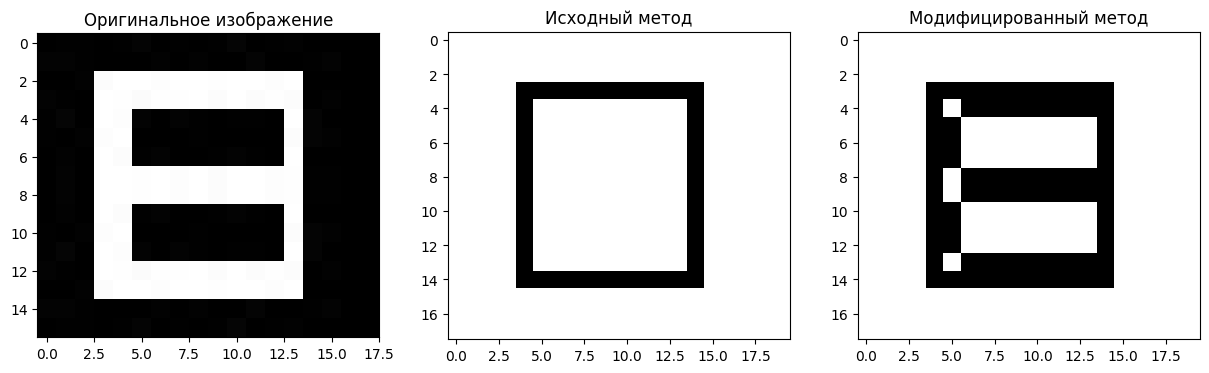

<ipython-input-16-f255dc1e749b>:129: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -3 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img[findingContourInWhileStartingPointI][findingContourInWhileStartingPointJ] = -contourNumber




Время работы исходного метода:  0.004942178726196289
Время работы модифицированного метода:  0.004876136779785156


Количество внешних найденных контуров исходным методом:  2
Количество внешних найденных контуров модифицированным методом:  1
Количество внешних контуров на картинке:  1


Количество найденных контуров исходным методом:  2
Количество найденных контуров модифицированным методом:  2
Количество контуров на картинке:  2




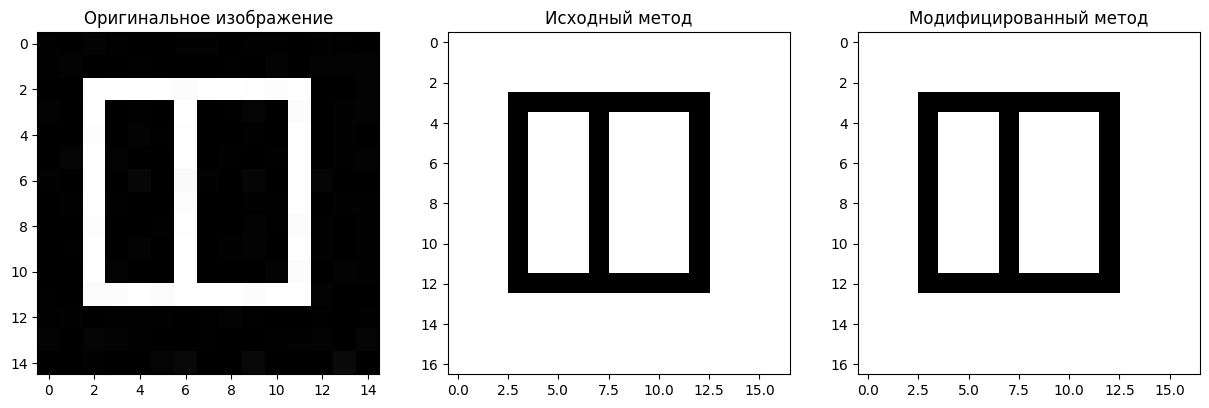

<ipython-input-16-f255dc1e749b>:129: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -4 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img[findingContourInWhileStartingPointI][findingContourInWhileStartingPointJ] = -contourNumber




Время работы исходного метода:  0.005386829376220703
Время работы модифицированного метода:  0.005335807800292969


Количество внешних найденных контуров исходным методом:  3
Количество внешних найденных контуров модифицированным методом:  1
Количество внешних контуров на картинке:  1


Количество найденных контуров исходным методом:  3
Количество найденных контуров модифицированным методом:  4
Количество контуров на картинке:  4




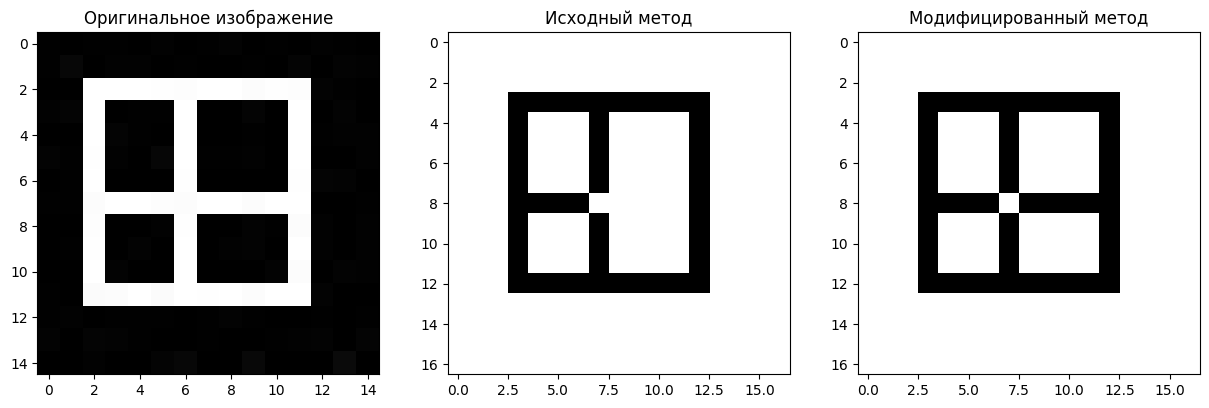

<ipython-input-16-f255dc1e749b>:129: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -5 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img[findingContourInWhileStartingPointI][findingContourInWhileStartingPointJ] = -contourNumber
<ipython-input-16-f255dc1e749b>:129: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -6 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img[findingContourInWhileStartingPointI][findingContourInWhileStartingPointJ] = -contourNumber
<ipython-input-16-f255dc1e749b>:129: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -7 to uint8



Время работы исходного метода:  0.006918430328369141
Время работы модифицированного метода:  0.006217479705810547


Количество внешних найденных контуров исходным методом:  5
Количество внешних найденных контуров модифицированным методом:  3
Количество внешних контуров на картинке:  3


Количество найденных контуров исходным методом:  6
Количество найденных контуров модифицированным методом:  6
Количество контуров на картинке:  6




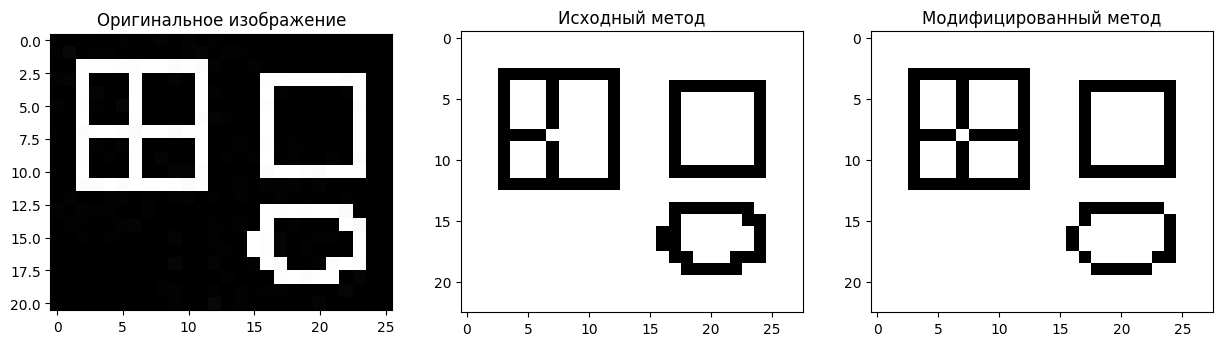

<ipython-input-16-f255dc1e749b>:102: RuntimeWarning: overflow encountered in scalar subtract
  Contour.isHole = (img[ContourStartingPointI][ContourStartingPointJ] - img[ContourStartingPointI+1][ContourStartingPointJ] >= 1)




Время работы исходного метода:  0.003391742706298828
Время работы модифицированного метода:  0.005277395248413086


Количество внешних найденных контуров исходным методом:  1
Количество внешних найденных контуров модифицированным методом:  1
Количество внешних контуров на картинке:  1


Количество найденных контуров исходным методом:  2
Количество найденных контуров модифицированным методом:  1
Количество контуров на картинке:  1




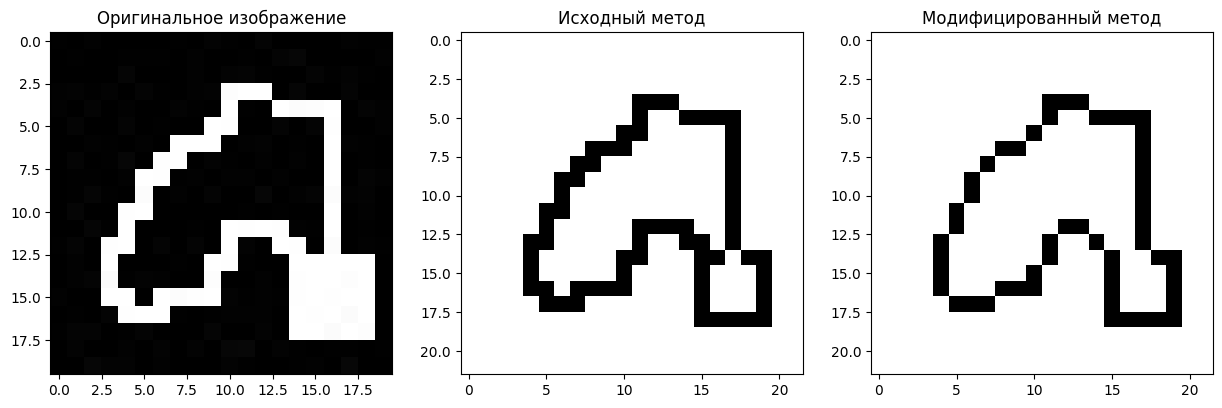

<ipython-input-16-f255dc1e749b>:129: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -8 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img[findingContourInWhileStartingPointI][findingContourInWhileStartingPointJ] = -contourNumber
<ipython-input-16-f255dc1e749b>:129: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -9 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img[findingContourInWhileStartingPointI][findingContourInWhileStartingPointJ] = -contourNumber
<ipython-input-16-f255dc1e749b>:129: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -10 to uint



Время работы исходного метода:  0.043183326721191406
Время работы модифицированного метода:  0.07813596725463867


Количество внешних найденных контуров исходным методом:  10
Количество внешних найденных контуров модифицированным методом:  11
Количество внешних контуров на картинке:  11


Количество найденных контуров исходным методом:  21
Количество найденных контуров модифицированным методом:  17
Количество контуров на картинке:  17




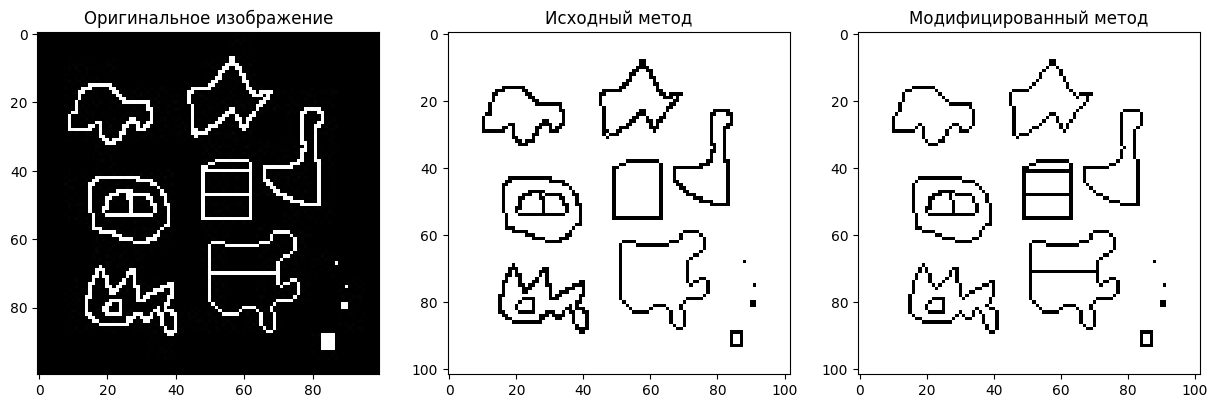

<ipython-input-16-f255dc1e749b>:111: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -7 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img[ContourStartingPointI][ContourStartingPointJ] = -contourNumber
<ipython-input-16-f255dc1e749b>:129: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -15 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img[findingContourInWhileStartingPointI][findingContourInWhileStartingPointJ] = -contourNumber
<ipython-input-16-f255dc1e749b>:111: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -17 to uint8 will fail in the future.




Время работы исходного метода:  0.14921784400939941
Время работы модифицированного метода:  0.678839921951294


Количество внешних найденных контуров исходным методом:  55
Количество внешних найденных контуров модифицированным методом:  60
Количество внешних контуров на картинке:  60


Количество найденных контуров исходным методом:  66
Количество найденных контуров модифицированным методом:  64
Количество контуров на картинке:  64




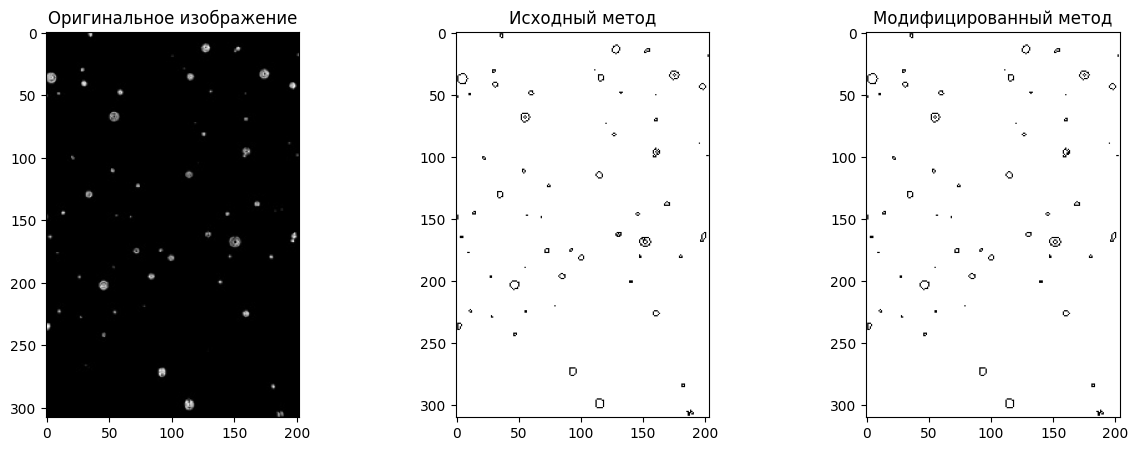

<ipython-input-16-f255dc1e749b>:111: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -5 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img[ContourStartingPointI][ContourStartingPointJ] = -contourNumber
<ipython-input-16-f255dc1e749b>:129: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -24 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img[findingContourInWhileStartingPointI][findingContourInWhileStartingPointJ] = -contourNumber
<ipython-input-16-f255dc1e749b>:111: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -46 to uint8 will fail in the future.




Время работы исходного метода:  0.19396567344665527
Время работы модифицированного метода:  0.996514081954956


Количество внешних найденных контуров исходным методом:  83
Количество внешних найденных контуров модифицированным методом:  85
Количество внешних контуров на картинке:  85


Количество найденных контуров исходным методом:  100
Количество найденных контуров модифицированным методом:  100
Количество контуров на картинке:  100




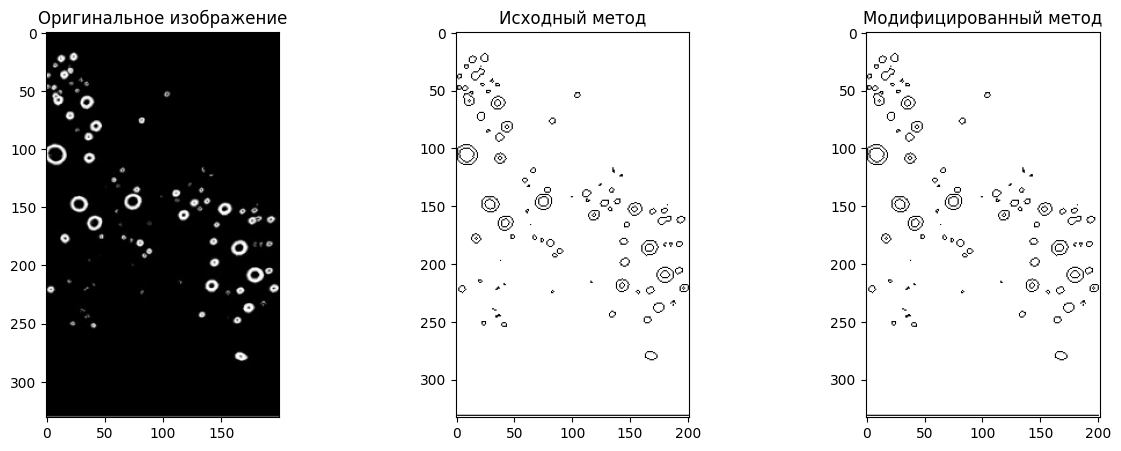

In [19]:
images_url = [
    "https://sun9-24.userapi.com/impg/Atxr5hdovLpt2LJddziKWKPqhTKF6MCng5F37Q/l_UySJGhN7A.jpg?size=15x15&quality=96&sign=59b3ff7f5b55b4df55183f1194149ceb&type=album",
    "https://sun9-35.userapi.com/impg/JOP-AW1ZaT9pouts5N_c1qrfWp_2fmed0HgkyQ/PqC4POO11A0.jpg?size=15x15&quality=96&sign=720ce9a2a885f7636b4bc019e8492c93&type=album",
    "https://sun9-42.userapi.com/impg/z8QS5smgWZ4DujR9RgIl9d8gCO12a5_A5_tUTA/tNu68LU3MZI.jpg?size=18x16&quality=96&sign=23e8b8dcc38d130d7da177be4ddb2ef5&type=album",
    "https://sun9-53.userapi.com/impg/tFzl5mNjpEEzUAxZFZWtpwpvwuMxRbMwJLcVzg/oXxNkaHVjnk.jpg?size=15x15&quality=96&sign=9afeb71b9f87037a1814b0383d52bfcd&type=album",
    "https://sun9-23.userapi.com/impg/n6ThXsyv2SGnPsQVBpZ0sh-d-6cgqogVp-Z0OQ/nIspcvPSP4A.jpg?size=15x15&quality=96&sign=1cbd7f5c5478dcae839a4b79c67f5401&type=album",
    "https://sun9-79.userapi.com/impg/3jaesehAGPun8XOKBAXJDtX8WqpQAZ7_80N6nw/kbqiyCD3eFk.jpg?size=26x21&quality=96&sign=93bfeca439dc8d8e5e16a69a302c6fd7&type=album",
    "https://sun9-70.userapi.com/impg/x5mJrWARHQOdfINQsZD0hztsleMFD2IpZeG0Gg/Q3hvUGZfv-o.jpg?size=20x20&quality=96&sign=f1ddd4cd5da14f93b27202d09207b34c&type=album",
    "https://sun9-76.userapi.com/impg/WjFR01emfAml-iUMQudOOJenPFrdX6YaW7HfnA/NXcBaKShjcQ.jpg?size=100x100&quality=96&sign=b74b9d99caa5efd202a82c07c2975fdc&type=album",
    "https://sun9-80.userapi.com/impg/OSyhdCPkDGav0eFfsuA1hyzXuCoKjgjtHMzRvg/IKS8zaWNOzs.jpg?size=202x308&quality=96&sign=ba1dc554d28acaf52a9cb8b21cc35df6&type=album",
    "https://sun9-30.userapi.com/impg/c9b7i1RfUsG4Ld7rHyeO-PuFafFSbEuvbiaA9g/Fd6OjhLw9d8.jpg?size=200x331&quality=96&sign=863a5a562318de7e37cb54ea26381a79&type=album"
    ]
for img in images_url:
  findContoursMethodFull(img, False, False, False)

<ipython-input-16-f255dc1e749b>:129: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -2 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img[findingContourInWhileStartingPointI][findingContourInWhileStartingPointJ] = -contourNumber




Время работы исходного метода:  0.0035505294799804688
Время работы модифицированного метода:  0.004110574722290039


Количество внешних найденных контуров исходным методом:  1
Количество внешних найденных контуров модифицированным методом:  1
Количество внешних контуров на картинке:  1


Количество найденных контуров исходным методом:  1
Количество найденных контуров модифицированным методом:  1
Количество контуров на картинке:  1




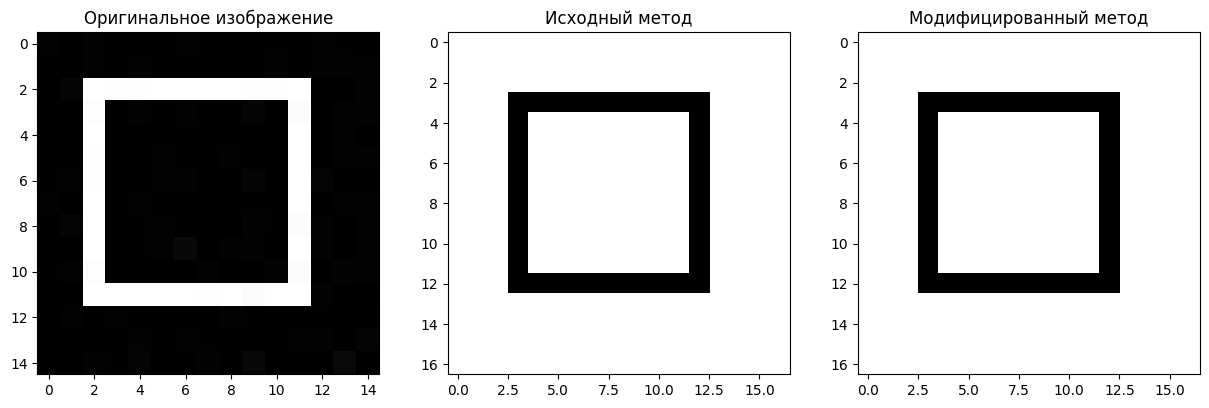

In [20]:
images_url = [
    "https://sun9-24.userapi.com/impg/Atxr5hdovLpt2LJddziKWKPqhTKF6MCng5F37Q/l_UySJGhN7A.jpg?size=15x15&quality=96&sign=59b3ff7f5b55b4df55183f1194149ceb&type=album",
    ]
for img in images_url:
  findContoursMethodFull(img, False, False, False)

<ipython-input-16-f255dc1e749b>:129: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -2 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img[findingContourInWhileStartingPointI][findingContourInWhileStartingPointJ] = -contourNumber




Время работы исходного метода:  0.001772165298461914
Время работы модифицированного метода:  0.0026330947875976562


Количество внешних найденных контуров исходным методом:  1
Количество внешних найденных контуров модифицированным методом:  1
Количество внешних контуров на картинке:  1


Количество найденных контуров исходным методом:  1
Количество найденных контуров модифицированным методом:  2
Количество контуров на картинке:  2




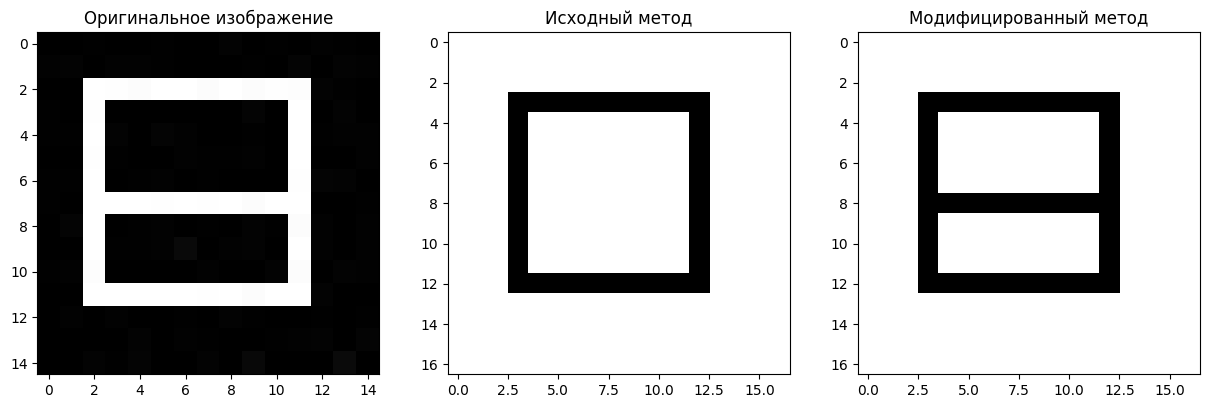

In [21]:
images_url = [
    "https://sun9-35.userapi.com/impg/JOP-AW1ZaT9pouts5N_c1qrfWp_2fmed0HgkyQ/PqC4POO11A0.jpg?size=15x15&quality=96&sign=720ce9a2a885f7636b4bc019e8492c93&type=album",
    ]
for img in images_url:
  findContoursMethodFull(img, False, False, False)

<ipython-input-16-f255dc1e749b>:129: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -2 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img[findingContourInWhileStartingPointI][findingContourInWhileStartingPointJ] = -contourNumber




Время работы исходного метода:  0.0021238327026367188
Время работы модифицированного метода:  0.003681182861328125


Количество внешних найденных контуров исходным методом:  1
Количество внешних найденных контуров модифицированным методом:  1
Количество внешних контуров на картинке:  1


Количество найденных контуров исходным методом:  1
Количество найденных контуров модифицированным методом:  3
Количество контуров на картинке:  3




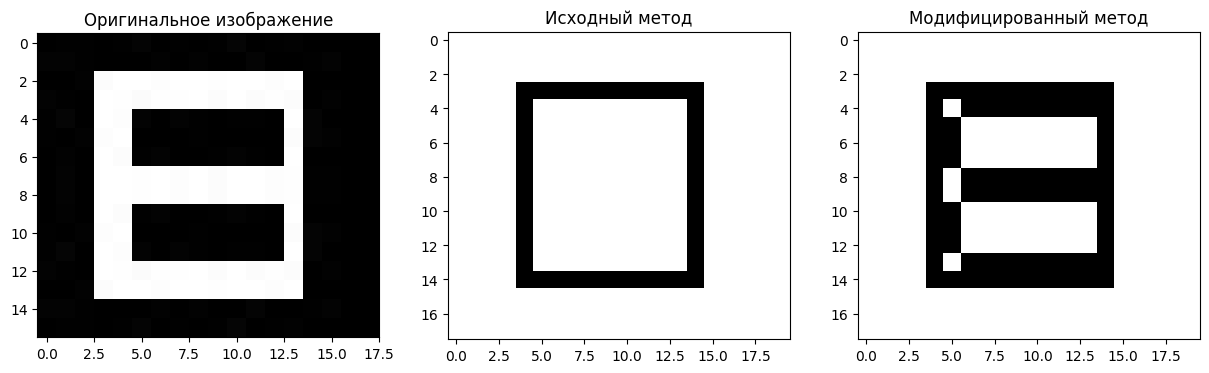

In [22]:
images_url = [

    "https://sun9-42.userapi.com/impg/z8QS5smgWZ4DujR9RgIl9d8gCO12a5_A5_tUTA/tNu68LU3MZI.jpg?size=18x16&quality=96&sign=23e8b8dcc38d130d7da177be4ddb2ef5&type=album",

    ]
for img in images_url:
  findContoursMethodFull(img, False, False, False)

<ipython-input-16-f255dc1e749b>:129: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -2 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img[findingContourInWhileStartingPointI][findingContourInWhileStartingPointJ] = -contourNumber
<ipython-input-16-f255dc1e749b>:129: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -3 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img[findingContourInWhileStartingPointI][findingContourInWhileStartingPointJ] = -contourNumber




Время работы исходного метода:  0.0023398399353027344
Время работы модифицированного метода:  0.0028498172760009766


Количество внешних найденных контуров исходным методом:  2
Количество внешних найденных контуров модифицированным методом:  1
Количество внешних контуров на картинке:  1


Количество найденных контуров исходным методом:  2
Количество найденных контуров модифицированным методом:  2
Количество контуров на картинке:  2




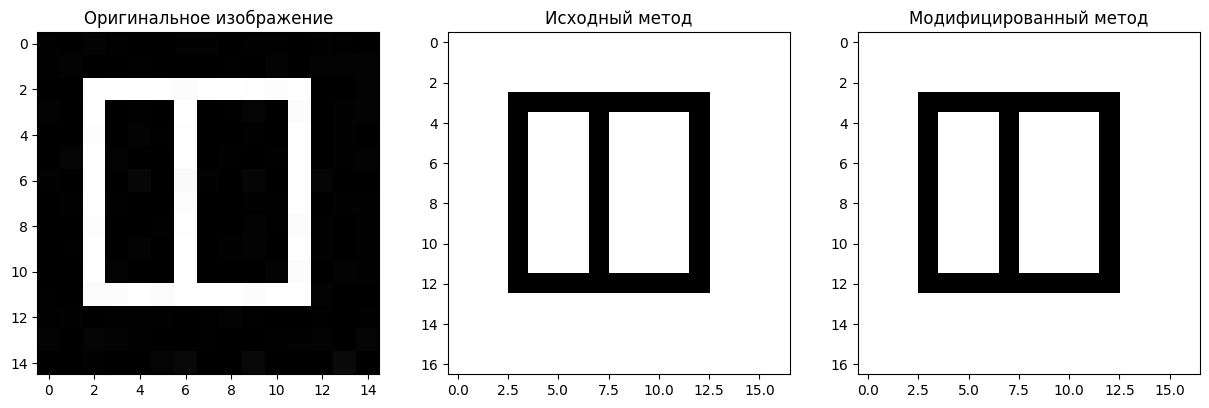

In [23]:
images_url = [

    "https://sun9-53.userapi.com/impg/tFzl5mNjpEEzUAxZFZWtpwpvwuMxRbMwJLcVzg/oXxNkaHVjnk.jpg?size=15x15&quality=96&sign=9afeb71b9f87037a1814b0383d52bfcd&type=album",

    ]
for img in images_url:
  findContoursMethodFull(img, False, False, False)

<ipython-input-16-f255dc1e749b>:129: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -2 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img[findingContourInWhileStartingPointI][findingContourInWhileStartingPointJ] = -contourNumber
<ipython-input-16-f255dc1e749b>:129: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -3 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img[findingContourInWhileStartingPointI][findingContourInWhileStartingPointJ] = -contourNumber
<ipython-input-16-f255dc1e749b>:129: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -4 to uint8



Время работы исходного метода:  0.003237009048461914
Время работы модифицированного метода:  0.0035271644592285156


Количество внешних найденных контуров исходным методом:  3
Количество внешних найденных контуров модифицированным методом:  1
Количество внешних контуров на картинке:  1


Количество найденных контуров исходным методом:  3
Количество найденных контуров модифицированным методом:  4
Количество контуров на картинке:  4




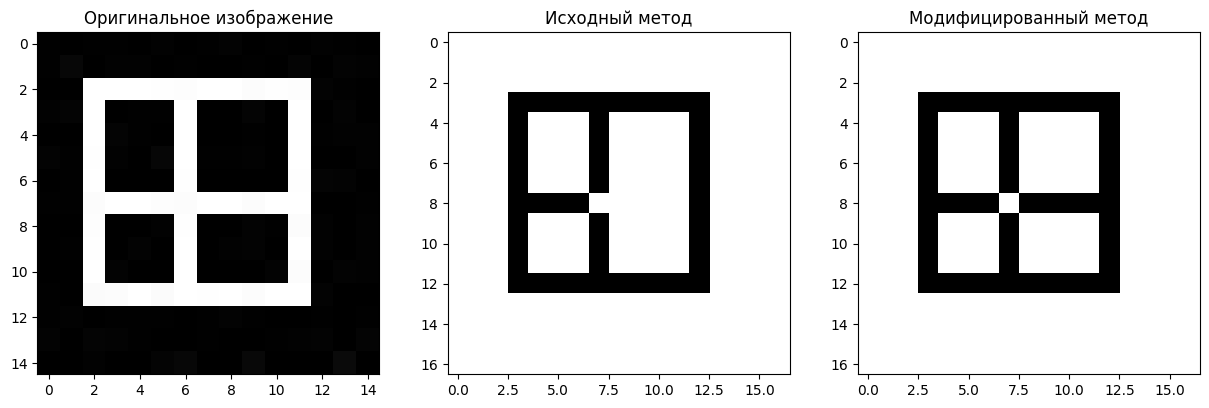

In [24]:
images_url = [

    "https://sun9-23.userapi.com/impg/n6ThXsyv2SGnPsQVBpZ0sh-d-6cgqogVp-Z0OQ/nIspcvPSP4A.jpg?size=15x15&quality=96&sign=1cbd7f5c5478dcae839a4b79c67f5401&type=album",

    ]
for img in images_url:
  findContoursMethodFull(img, False, False, False)

<ipython-input-16-f255dc1e749b>:129: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -2 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img[findingContourInWhileStartingPointI][findingContourInWhileStartingPointJ] = -contourNumber
<ipython-input-16-f255dc1e749b>:129: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -3 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img[findingContourInWhileStartingPointI][findingContourInWhileStartingPointJ] = -contourNumber
<ipython-input-16-f255dc1e749b>:129: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -4 to uint8



Время работы исходного метода:  0.004744529724121094
Время работы модифицированного метода:  0.008321285247802734


Количество внешних найденных контуров исходным методом:  5
Количество внешних найденных контуров модифицированным методом:  3
Количество внешних контуров на картинке:  3


Количество найденных контуров исходным методом:  6
Количество найденных контуров модифицированным методом:  6
Количество контуров на картинке:  6




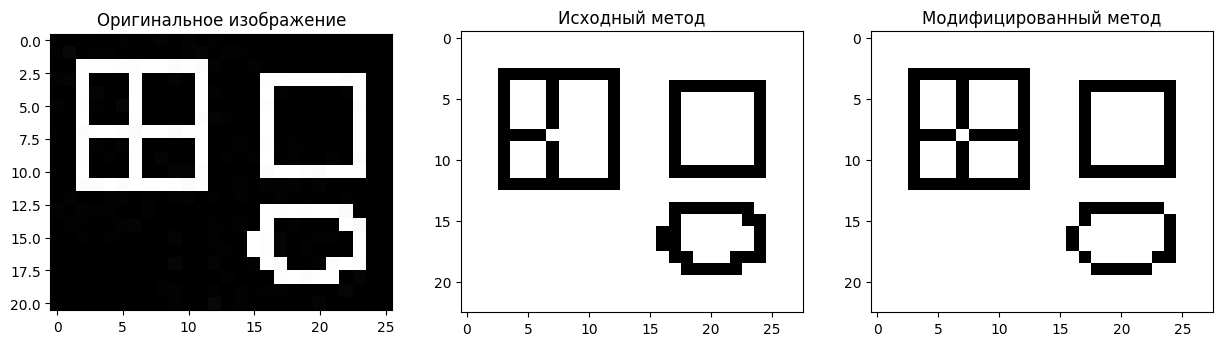

In [25]:
images_url = [

    "https://sun9-79.userapi.com/impg/3jaesehAGPun8XOKBAXJDtX8WqpQAZ7_80N6nw/kbqiyCD3eFk.jpg?size=26x21&quality=96&sign=93bfeca439dc8d8e5e16a69a302c6fd7&type=album",

    ]
for img in images_url:
  findContoursMethodFull(img, False, False, False)

<ipython-input-16-f255dc1e749b>:129: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -2 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img[findingContourInWhileStartingPointI][findingContourInWhileStartingPointJ] = -contourNumber
<ipython-input-16-f255dc1e749b>:102: RuntimeWarning: overflow encountered in scalar subtract
  Contour.isHole = (img[ContourStartingPointI][ContourStartingPointJ] - img[ContourStartingPointI+1][ContourStartingPointJ] >= 1)
<ipython-input-16-f255dc1e749b>:129: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -3 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img[findingContourInWhileStartingPointI][findi



Время работы исходного метода:  0.0034601688385009766
Время работы модифицированного метода:  0.0038421154022216797


Количество внешних найденных контуров исходным методом:  1
Количество внешних найденных контуров модифицированным методом:  1
Количество внешних контуров на картинке:  1


Количество найденных контуров исходным методом:  2
Количество найденных контуров модифицированным методом:  1
Количество контуров на картинке:  1




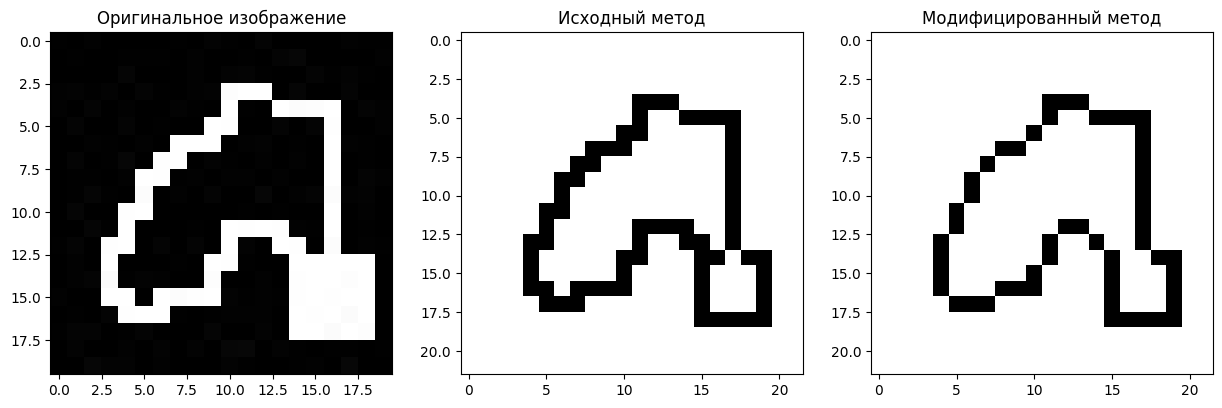

In [26]:
images_url = [

    "https://sun9-70.userapi.com/impg/x5mJrWARHQOdfINQsZD0hztsleMFD2IpZeG0Gg/Q3hvUGZfv-o.jpg?size=20x20&quality=96&sign=f1ddd4cd5da14f93b27202d09207b34c&type=album",

    ]
for img in images_url:
  findContoursMethodFull(img, False, False, False)

<ipython-input-16-f255dc1e749b>:129: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -2 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img[findingContourInWhileStartingPointI][findingContourInWhileStartingPointJ] = -contourNumber
<ipython-input-16-f255dc1e749b>:129: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -3 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img[findingContourInWhileStartingPointI][findingContourInWhileStartingPointJ] = -contourNumber
<ipython-input-16-f255dc1e749b>:129: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -4 to uint8



Время работы исходного метода:  0.0571746826171875
Время работы модифицированного метода:  0.08116602897644043


Количество внешних найденных контуров исходным методом:  10
Количество внешних найденных контуров модифицированным методом:  11
Количество внешних контуров на картинке:  11


Количество найденных контуров исходным методом:  21
Количество найденных контуров модифицированным методом:  17
Количество контуров на картинке:  17




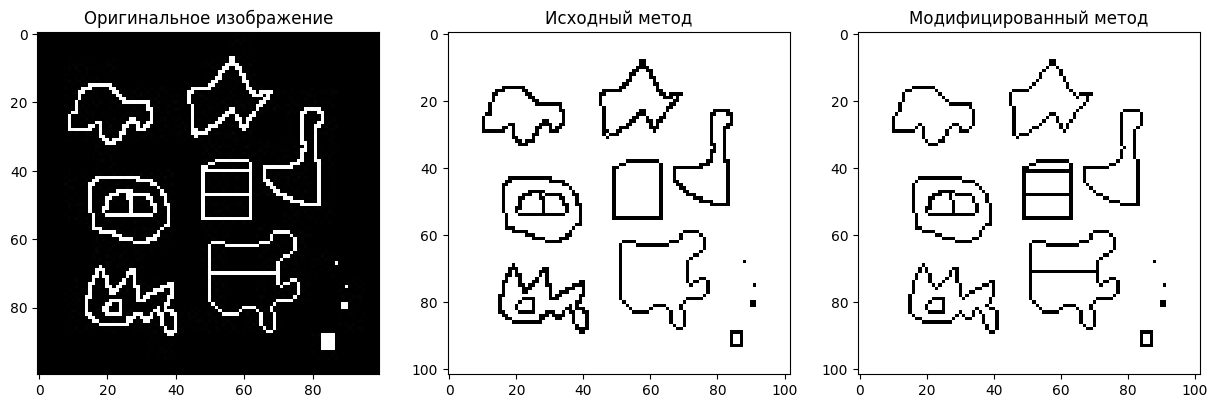

In [27]:
images_url = [

    "https://sun9-76.userapi.com/impg/WjFR01emfAml-iUMQudOOJenPFrdX6YaW7HfnA/NXcBaKShjcQ.jpg?size=100x100&quality=96&sign=b74b9d99caa5efd202a82c07c2975fdc&type=album",

    ]
for img in images_url:
  findContoursMethodFull(img, False, False, False)

<ipython-input-16-f255dc1e749b>:129: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -2 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img[findingContourInWhileStartingPointI][findingContourInWhileStartingPointJ] = -contourNumber
<ipython-input-16-f255dc1e749b>:129: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -3 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img[findingContourInWhileStartingPointI][findingContourInWhileStartingPointJ] = -contourNumber
<ipython-input-16-f255dc1e749b>:129: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -4 to uint8



Время работы исходного метода:  0.15541458129882812
Время работы модифицированного метода:  0.6878926753997803


Количество внешних найденных контуров исходным методом:  55
Количество внешних найденных контуров модифицированным методом:  60
Количество внешних контуров на картинке:  60


Количество найденных контуров исходным методом:  66
Количество найденных контуров модифицированным методом:  64
Количество контуров на картинке:  64




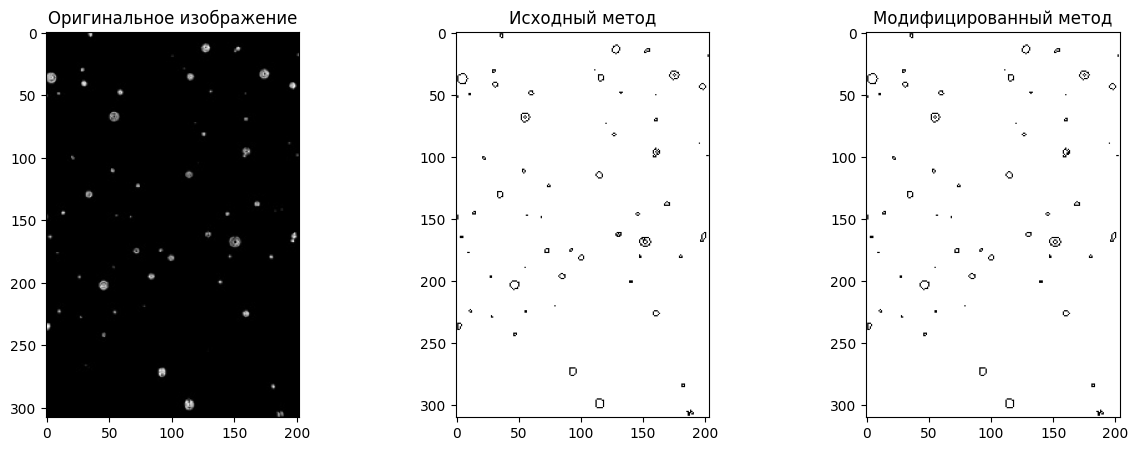

In [28]:
images_url = [

    "https://sun9-80.userapi.com/impg/OSyhdCPkDGav0eFfsuA1hyzXuCoKjgjtHMzRvg/IKS8zaWNOzs.jpg?size=202x308&quality=96&sign=ba1dc554d28acaf52a9cb8b21cc35df6&type=album",
    ]
for img in images_url:
  findContoursMethodFull(img, False, False, False)

<ipython-input-16-f255dc1e749b>:129: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -2 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img[findingContourInWhileStartingPointI][findingContourInWhileStartingPointJ] = -contourNumber
<ipython-input-16-f255dc1e749b>:129: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -3 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img[findingContourInWhileStartingPointI][findingContourInWhileStartingPointJ] = -contourNumber
<ipython-input-16-f255dc1e749b>:129: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -4 to uint8



Время работы исходного метода:  0.3879568576812744
Время работы модифицированного метода:  1.3882451057434082


Количество внешних найденных контуров исходным методом:  83
Количество внешних найденных контуров модифицированным методом:  85
Количество внешних контуров на картинке:  85


Количество найденных контуров исходным методом:  100
Количество найденных контуров модифицированным методом:  100
Количество контуров на картинке:  100




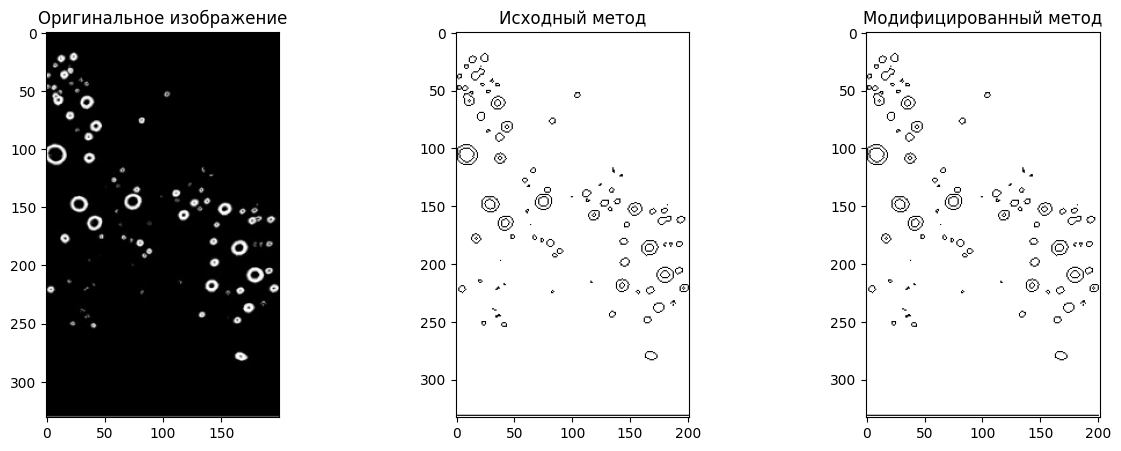

In [29]:
images_url = [

    "https://sun9-30.userapi.com/impg/c9b7i1RfUsG4Ld7rHyeO-PuFafFSbEuvbiaA9g/Fd6OjhLw9d8.jpg?size=200x331&quality=96&sign=863a5a562318de7e37cb54ea26381a79&type=album"
    ]
for img in images_url:
  findContoursMethodFull(img, False, False, False)

<ipython-input-16-f255dc1e749b>:111: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -2 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img[ContourStartingPointI][ContourStartingPointJ] = -contourNumber




Время работы исходного метода:  0.0004286766052246094
Время работы модифицированного метода:  0.0003058910369873047


Количество внешних найденных контуров исходным методом:  0
Количество внешних найденных контуров модифицированным методом:  1
Количество внешних контуров на картинке:  1


Количество найденных контуров исходным методом:  1
Количество найденных контуров модифицированным методом:  1
Количество контуров на картинке:  1




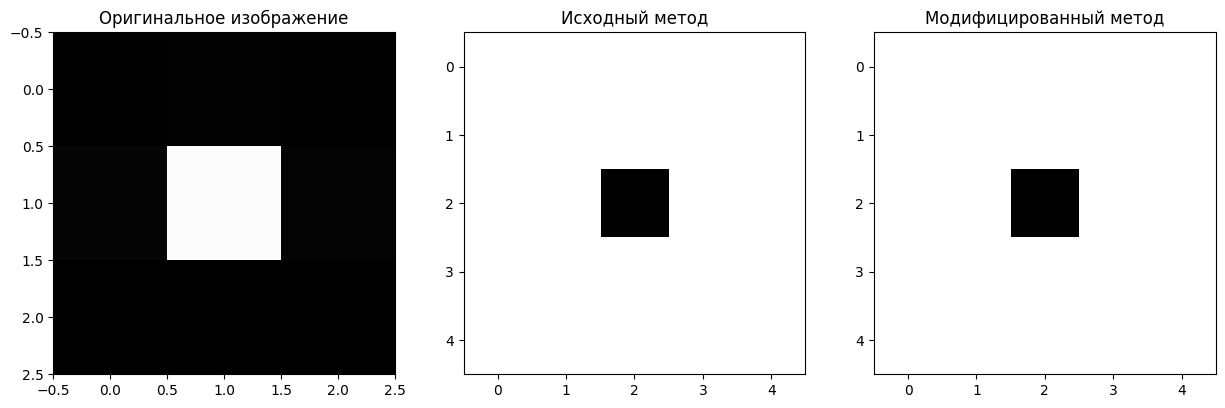

In [30]:
images_url = [

    "https://sun9-65.userapi.com/impg/4POSOIHF8eTvj4rTbiU9tpD3ALKsaph-4szr1g/1V7oMvlaYzc.jpg?size=3x3&quality=96&sign=a44da2949e208cf8e5c6432435a1a8c4&type=album"
    ]
for img in images_url:
  findContoursMethodFull(img, False, False, False)

In [31]:
images_url = [

    "https://psv4.userapi.com/c909218/u267814647/docs/d51/81d70a4f9c39/Figury4k.png?extra=mlfvwDlecmdGN3OcUgE3-6ZyixwJ2T7Kl-01Ji61yXfQ0KxiXRNJ3kFC9yM1b0vHSE0wpFMBE1pppHWjmfRQglngEEfxRH-rCUiHVdt1A8eaKh_RC445kS9oG1FpiGvsy5iGJhk3GO-0TKlXzfIVMY18"
    ]
for img in images_url:
  findContoursMethodFull(img, False, False, False)

AttributeError: 'NoneType' object has no attribute 'shape'